# <img style="float: left; padding-right: 20px; width: 200px" src="https://raw.githubusercontent.com/raxlab/imt2200-data/main/media/logo.jpg">



# IMT 2200 - Introducción a Ciencia de Datos
**Pontificia Universidad Católica de Chile**<br>
**Instituto de Ingeniería Matemática y Computacional**<br>
**Profesor:** Rodrigo A. Carrasco <br>
**Alumno:** Israel Pino Saavedra <br>
---

Esta tarea tendrá como objetivo crear un predictor que determine el éxito o fracaso de una expedición a distintas montañas del Himalayas según datos del montañista y de la expedición. Vamos a responder a la pregunta de qué tan bien pueden atributos como año, estación, montaña, edad del montañista, entre otros, predecir el éxito o fracaso de una expedición.

# <h1><center> 3.1 DataFrame unificado (0.2 pts)
 </center></h1>


Sheets : https://docs.google.com/spreadsheets/d/11-fVTpCaHDj658sHjvNLFDWc1-Nyrv5u_Se79xvUAuI/edit?gid=0#gid=0

Conversa https://gemini.google.com/app/1a29c9a976bdb571 

In [2]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:
df_peaks=pd.read_csv('Himalayan+Expeditions/peaks.csv')
df_peaks_exp=pd.read_csv('Himalayan+Expeditions/peaks_with_exp.csv')
df_exped=pd.read_csv('Himalayan+Expeditions/exped.csv')
df_members=pd.read_csv('Himalayan+Expeditions/members.csv')

/var/folders/2m/78v6gw9x19x1vhlbn1gn2pp40000gn/T/ipykernel_1574/876091035.py:3: DtypeWarning: Columns (8,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df_exped=pd.read_csv('Himalayan+Expeditions/exped.csv')
/var/folders/2m/78v6gw9x19x1vhlbn1gn2pp40000gn/T/ipykernel_1574/876091035.py:4: DtypeWarning: Columns (34) have mixed types. Specify dtype option on import or set low_memory=False.
  df_members=pd.read_csv('Himalayan+Expeditions/members.csv')


In [5]:
cimas="df_peaks"
expediciones="df_exped"
miembros="df_members"
picosyexpediciones="df_peaks_exp"

In [6]:
print(f"Columnas de {cimas}: es {df_peaks.columns.tolist()}")
print(f"Columnas de {expediciones}: es {df_exped.columns.tolist()}")
print(f"Columnas de {miembros}: es {df_members.columns.tolist()}")
print(f"Columnas de {picosyexpediciones}: es {df_peaks_exp.columns.tolist()}")

Columnas de df_peaks: es ['peakid', 'pkname', 'pkname2', 'location', 'heightm', 'heightf', 'himal', 'region', 'open', 'unlisted', 'trekking', 'trekyear', 'restrict', 'phost', 'pstatus', 'pyear', 'pseason', 'pmonth', 'pday', 'pexpid', 'pcountry', 'psummiters', 'psmtnote']
Columnas de df_exped: es ['expid', 'peakid', 'year', 'season', 'host', 'route1', 'route2', 'route3', 'route4', 'nation', 'leaders', 'sponsor', 'success1', 'success2', 'success3', 'success4', 'ascent1', 'ascent2', 'ascent3', 'ascent4', 'claimed', 'disputed', 'countries', 'approach', 'bcdate', 'smtdate', 'smttime', 'smtdays', 'totdays', 'termdate', 'termreason', 'termnote', 'highpoint', 'traverse', 'ski', 'parapente', 'camps', 'rope', 'totmembers', 'smtmembers', 'mdeaths', 'tothired', 'smthired', 'hdeaths', 'nohired', 'o2used', 'o2none', 'o2climb', 'o2descent', 'o2sleep', 'o2medical', 'o2taken', 'o2unkwn', 'othersmts', 'campsites', 'accidents', 'achievment', 'agency', 'comrte', 'stdrte', 'primrte', 'primmem', 'primref', 

Eliminamos las columnas que no usaremos

In [7]:
df_peaks= df_peaks[["peakid","pkname","heightm"]]
df_exped= df_exped[["expid","peakid","year","season"]]
df_members=df_members[["expid","membid","peakid","sex","myear","yob","citizen","msuccess"]]
df_peaks_exp=df_peaks_exp[["peakid","success_exp","failed_exp"]]

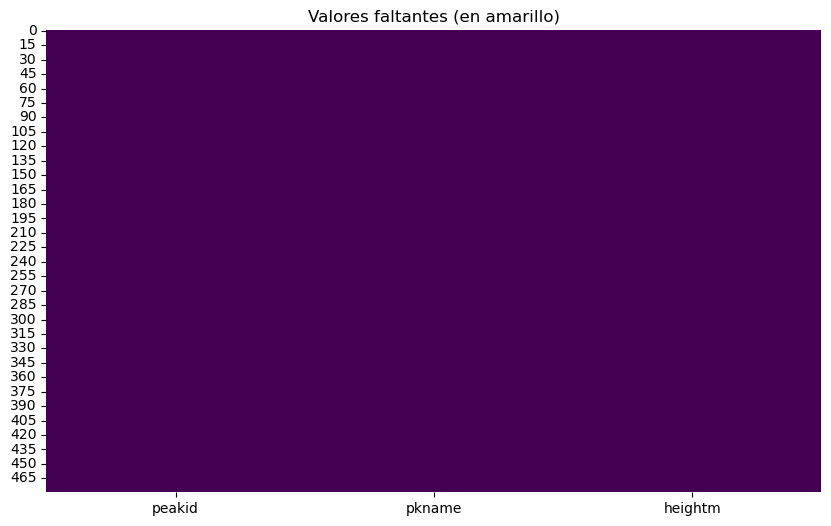

In [8]:
df = df_peaks

# Dibujar el mapa de calor
plt.figure(figsize=(10, 6)) 

# Usar df.isnull() para obtener un booleano (True si es NaN)
# cbar=False elimina la barra de color lateral
# cmap='viridis' usa un esquema de color que resalta los faltantes
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Valores faltantes (en amarillo)")
plt.show()

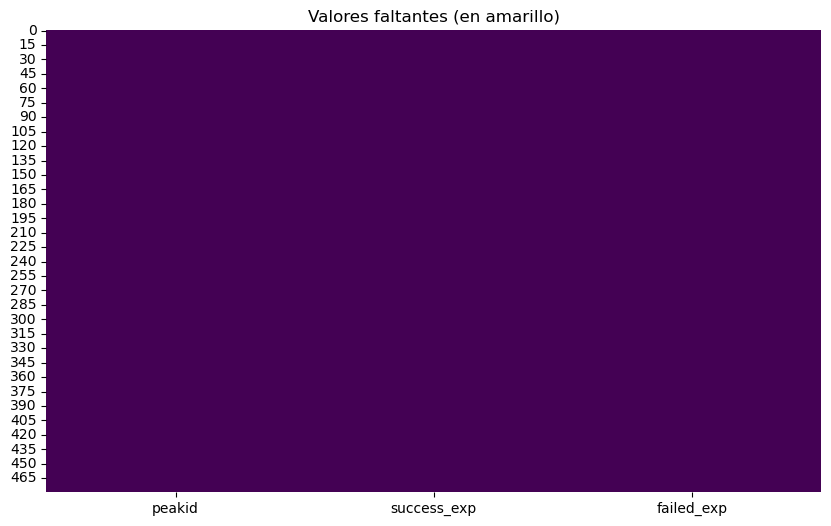

In [9]:
df = df_peaks_exp

# Dibujar el mapa de calor
plt.figure(figsize=(10, 6)) 

# Usar df.isnull() para obtener un booleano (True si es NaN)
# cbar=False elimina la barra de color lateral
# cmap='viridis' usa un esquema de color que resalta los faltantes
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Valores faltantes (en amarillo)")
plt.show()

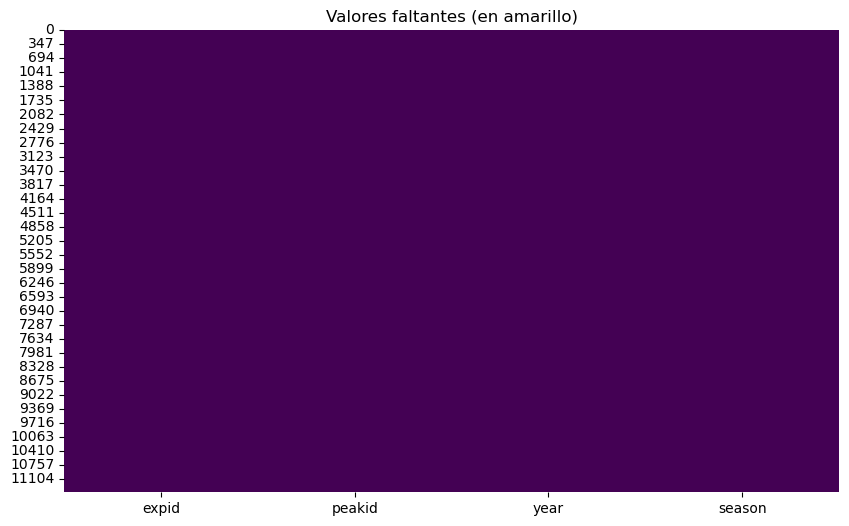

In [10]:
df = df_exped

# Dibujar el mapa de calor
plt.figure(figsize=(10, 6)) 

# Usar df.isnull() para obtener un booleano (True si es NaN)
# cbar=False elimina la barra de color lateral
# cmap='viridis' usa un esquema de color que resalta los faltantes
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Valores faltantes (en amarillo)")
plt.show()

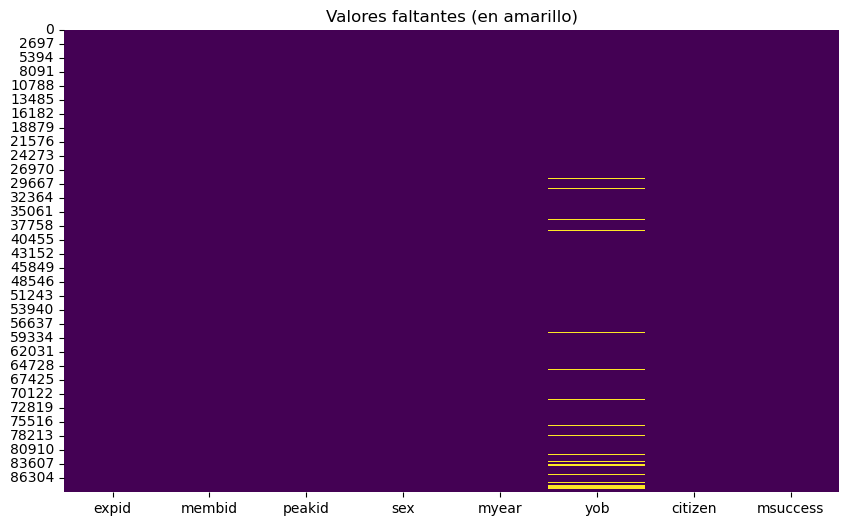

In [11]:
df = df_members

# Dibujar el mapa de calor
plt.figure(figsize=(10, 6)) 

# Usar df.isnull() para obtener un booleano (True si es NaN)
# cbar=False elimina la barra de color lateral
# cmap='viridis' usa un esquema de color que resalta los faltantes
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Valores faltantes (en amarillo)")
plt.show()

In [12]:
print (f"El total de filas de {cimas} es {len(df_peaks)}")
print (f"El total de filas de {expediciones} es {len(df_exped)}")
print (f"El total de filas de {miembros} es {len(df_members)}")
print (f"El total de filas de {picosyexpediciones} es {len(df_peaks_exp)}")

El total de filas de df_peaks es 480
El total de filas de df_exped es 11425
El total de filas de df_members es 89000
El total de filas de df_peaks_exp es 480


In [13]:
print(f"Se repiten {df_peaks["peakid"].duplicated().sum()} peakid de {cimas}")
print(f"Se repiten {df_exped["expid"].duplicated().sum()} expid de {expediciones}")
print(f"Se repiten {df_members["expid"].duplicated().sum()} expid de {miembros}")
print(f"Se repiten {df_peaks_exp["peakid"].duplicated().sum()} peakid de {picosyexpediciones}")

Se repiten 0 peakid de df_peaks
Se repiten 4 expid de df_exped
Se repiten 77594 expid de df_members
Se repiten 0 peakid de df_peaks_exp


In [14]:
#verificar en dataframe df_expid si las 4 duplicados tienen el mismo peakid 
duplicados_exped=df_exped[df_exped["expid"].duplicated(keep=False)]
print(duplicados_exped.sort_values("expid"))


           expid peakid  year  season
2736   EVER21101   EVER  1921  Spring
10569  EVER21101   EVER  2021  Spring
2737   EVER22101   EVER  1922  Spring
10780  EVER22101   EVER  2022  Spring
2738   EVER24101   EVER  1924  Spring
11342  EVER24101   EVER  2024  Spring
2861   KANG10101   KANG  1910  Spring
6787   KANG10101   KANG  2010  Spring


In [15]:
#creamos una nueva columna que combina expid y year en el caso de df_exped 
df_exped["nueva_expid"] = df_exped["expid"].astype(str) + "_" + df_exped["year"].astype(str)
#y creamos una nueva columna que combina expid y myear para el caso del df_members
df_members["nueva_expid"] = df_members["expid"].astype(str) + "_" + df_members["myear"].astype(str)

#por ultimo mostramos las columnas creadas en ambos dataframes
print(df_exped[["expid", "year", "nueva_expid"]])
print(df_members[["expid", "myear", "nueva_expid"]])

           expid  year     nueva_expid
0      ANN260101  1960  ANN260101_1960
1      ANN269301  1969  ANN269301_1969
2      ANN273101  1973  ANN273101_1973
3      ANN278301  1978  ANN278301_1978
4      ANN279301  1979  ANN279301_1979
...          ...   ...             ...
11420  PATR24201  2024  PATR24201_2024
11421  PUMO24101  2024  PUMO24101_2024
11422  PUTH24101  2024  PUTH24101_2024
11423  TKPO24101  2024  TKPO24101_2024
11424  YLNG24101  2024  YLNG24101_2024

[11425 rows x 3 columns]
           expid  myear     nueva_expid
0      AMAD01101   2001  AMAD01101_2001
1      AMAD01101   2001  AMAD01101_2001
2      AMAD01101   2001  AMAD01101_2001
3      AMAD01101   2001  AMAD01101_2001
4      AMAD01101   2001  AMAD01101_2001
...          ...    ...             ...
88995  SURM74101   1905  SURM74101_1905
88996  SURM74101   1905  SURM74101_1905
88997  SURM74101   1905  SURM74101_1905
88998  SURM74101   1905  SURM74101_1905
88999  SURM74101   1905  SURM74101_1905

[89000 rows x 3 columns]


In [16]:
#Modificamos el dataframe df_exped y df_member para eliminar la columna expid
df_exped = df_exped.drop(columns=["expid"])
df_members = df_members.drop(columns=["expid"])

print(df_exped.head())
print(df_members.head())

  peakid  year  season     nueva_expid
0   ANN2  1960  Spring  ANN260101_1960
1   ANN2  1969  Autumn  ANN269301_1969
2   ANN2  1973  Spring  ANN273101_1973
3   ANN2  1978  Autumn  ANN278301_1978
4   ANN2  1979  Autumn  ANN279301_1979
   membid peakid sex  myear     yob    citizen  msuccess     nueva_expid
0       2   AMAD   M   2001  1972.0  Australia     False  AMAD01101_2001
1       1   AMAD   M   2001  1968.0  Australia     False  AMAD01101_2001
2       3   AMAD   M   2001  1960.0  Australia     False  AMAD01101_2001
3       4   AMAD   M   2001  1966.0  Australia     False  AMAD01101_2001
4       5   AMAD   F   2001  1970.0  Australia     False  AMAD01101_2001


------------

### Merge de peaks con peaks_with_exp

In [17]:
df_peaks.head()

peakid         pkname  heightm
0   ACHN         Aichyn     6055
1   AMAD     Ama Dablam     6814
2   AMOT       Amotsang     6393
3   AMPG  Amphu Gyabjen     5630
4   AMPH        Amphu I     6740

In [18]:
df_peaks_exp.head()

peakid  success_exp  failed_exp
0   ACHN            2           1
1   AMAD         1123         453
2   AMOT            1           2
3   AMPG            3           1
4   AMPH            1           1

In [19]:
#Hacemos merge de peak con peak_exp
peaks_y_peaks_exp = pd.merge(df_peaks, df_peaks_exp, on="peakid", how="outer") #elegimos outer para conservar todas las ids de cimas
peaks_y_peaks_exp.head()

peakid         pkname  heightm  success_exp  failed_exp
0   ACHN         Aichyn     6055            2           1
1   AMAD     Ama Dablam     6814         1123         453
2   AMOT       Amotsang     6393            1           2
3   AMPG  Amphu Gyabjen     5630            3           1
4   AMPH        Amphu I     6740            1           1

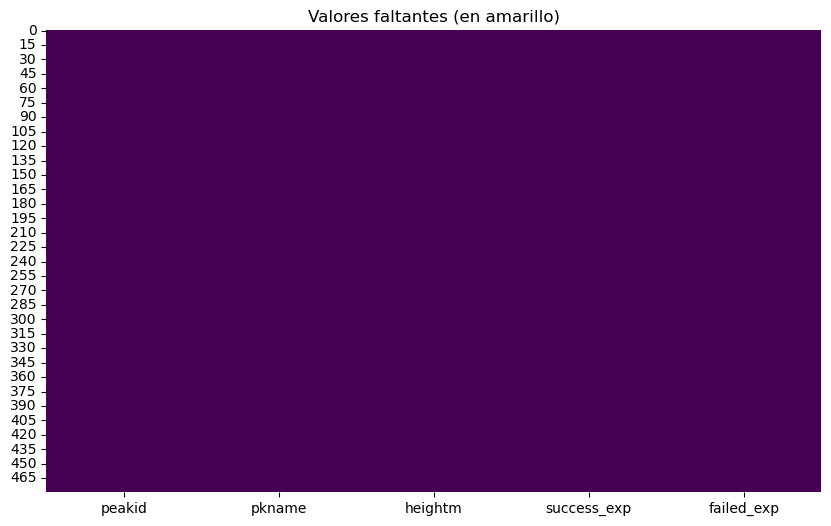

In [20]:
df = peaks_y_peaks_exp

# Dibujar el mapa de calor
plt.figure(figsize=(10, 6)) 

# Usar df.isnull() para obtener un booleano (True si es NaN)
# cbar=False elimina la barra de color lateral
# cmap='viridis' usa un esquema de color que resalta los faltantes
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Valores faltantes (en amarillo)")
plt.show()

---

### Merge de `peaks_y_peaks_exp` con df_exped

In [21]:
peaks_y_peaks_exp_y_exped = pd.merge(
    peaks_y_peaks_exp,                  
    df_exped,                    
    on='peakid',            
    how='outer'
)
print(f"El total de filas de df_final es {len(peaks_y_peaks_exp_y_exped)}")


El total de filas de df_final es 11489


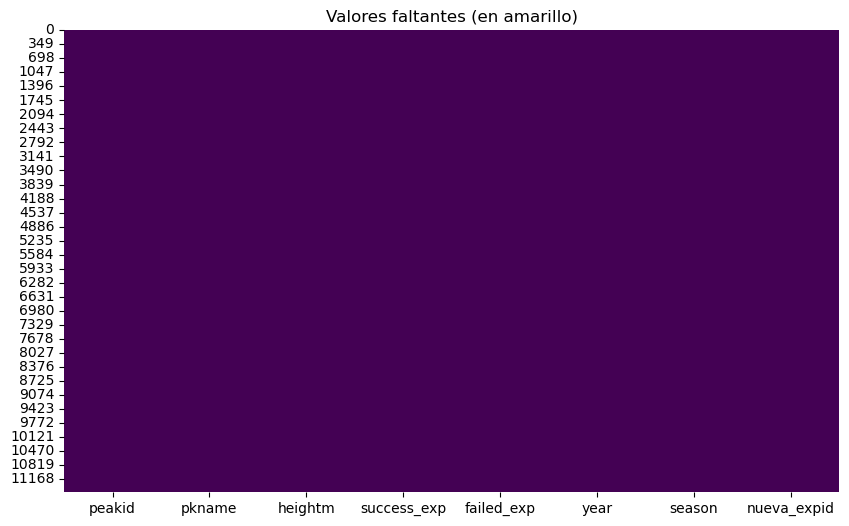

In [22]:
df = peaks_y_peaks_exp_y_exped

# Dibujar el mapa de calor para ver si hay valores faltantes
plt.figure(figsize=(10, 6)) 

# Usar df.isnull() para obtener un booleano (True si es NaN)
# cbar=False elimina la barra de color lateral
# cmap='viridis' usa un esquema de color que resalta los faltantes
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Valores faltantes (en amarillo)")
plt.show()

In [23]:
peaks_y_peaks_exp_y_exped.sample(15)

peakid         pkname  heightm  success_exp  failed_exp    year  season  \
6843    EVER        Everest     8849         1495         852  2022.0  Spring   
7669    KALI     Kali Himal     6985            4           0  2004.0  Spring   
7287    HIML  Himlung Himal     7126          145          69  2001.0  Spring   
7873    KANG  Kangchenjunga     8586          127          77  2018.0  Spring   
10027   MANA        Manaslu     8163          457         318  2022.0  Autumn   
9217    MAKA         Makalu     8485          171         212  2014.0  Spring   
2141    BARU       Baruntse     7152          131         204  1993.0  Autumn   
10508   PUMO         Pumori     7138          130         146  1989.0  Autumn   
4710    EVER        Everest     8849         1495         852  1983.0  Autumn   
2091    APIM       Api Main     7132            7          12  1953.0  Spring   
216     AMAD     Ama Dablam     6814         1123         453  1998.0  Autumn   
4282    DHA1   Dhaulagiri I     8167          183         241  2005.0  Autumn   
6496    EVER        Everest     8849         1495         852  2017.0  Spring   
1301    AMAD     Ama Dablam     6814         1123         453  2018.0  Autumn   
9221    MAKA         Makalu     8485          171         212  2014.0  Spring   

          nueva_expid  
6843   EVER22112_2022  
7669   KALI04101_2004  
7287   HIML01101_2001  
7873   KANG18105_2018  
10027  MANA22307_2022  
9217   MAKA14120_2014  
2141   BARU93304_1993  
10508  PUMO89303_1989  
4710   EVER83305_1983  
2091   APIM53101_1953  
216    AMAD98314_1998  
4282   DHA105303_2005  
6496   EVER17105_2017  
1301   AMAD18318_2018  
9221   MAKA14125_2014

---

### Merge de `peaks_y_peaks_exp_y_exped` con df_members

In [24]:
df_members.head()

membid peakid sex  myear     yob    citizen  msuccess     nueva_expid
0       2   AMAD   M   2001  1972.0  Australia     False  AMAD01101_2001
1       1   AMAD   M   2001  1968.0  Australia     False  AMAD01101_2001
2       3   AMAD   M   2001  1960.0  Australia     False  AMAD01101_2001
3       4   AMAD   M   2001  1966.0  Australia     False  AMAD01101_2001
4       5   AMAD   F   2001  1970.0  Australia     False  AMAD01101_2001

In [25]:
print(len(peaks_y_peaks_exp_y_exped))
print(len(df_members))

11489
89000


In [26]:
df_final = pd.merge(
    peaks_y_peaks_exp_y_exped,                  
    df_members,                    
    on='nueva_expid',            
    how='outer',
    suffixes=('_exped', '_member')
)
print(f"El total de filas de df_final es {len(df_final)}")

El total de filas de df_final es 92767


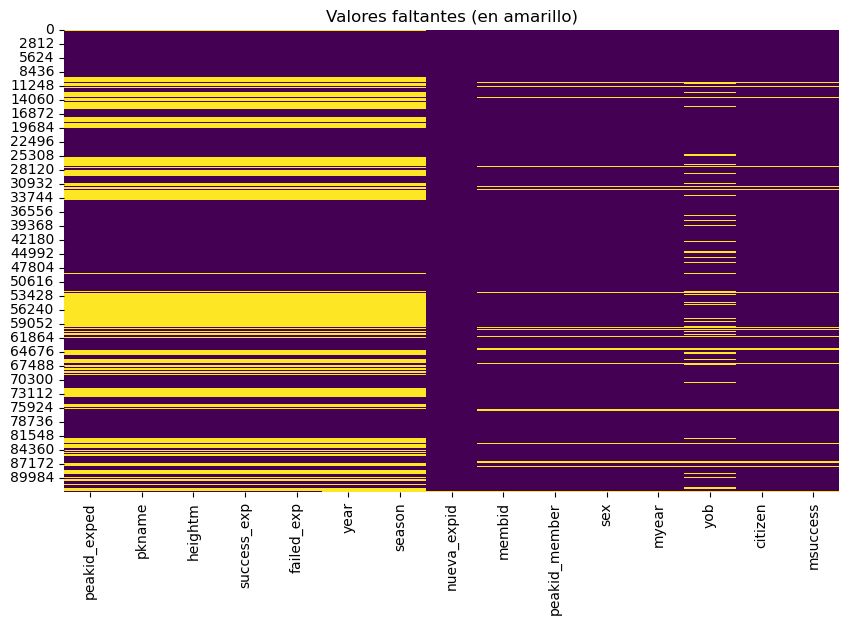

In [27]:
df = df_final

# Dibujar el mapa de calor para ver si hay valores faltantes
plt.figure(figsize=(10, 6)) 

# Usar df.isnull() para obtener un booleano (True si es NaN)
# cbar=False elimina la barra de color lateral
# cmap='viridis' usa un esquema de color que resalta los faltantes
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Valores faltantes (en amarillo)")
plt.show()

### Podemos observar que faltan los valores de peakid que se produjeron con el cruce, pero podemos arreglar eso imputando por ejemplo con nueva_expid que habiamos creado con anterioridad, a esta columna le sacamos las primeras cuatro letras y rellenamos peakid_exped

In [28]:
#sacamos las primeras cuatros letras de cada fila correspondiente a la columna nueva_expid para crear una nueva columna expid
df_final["peakid"] = df_final["nueva_expid"].str[:4]
df_final.head()

peakid_exped  pkname  heightm  success_exp  failed_exp    year  season  \
0         ACHN  Aichyn   6055.0          2.0         1.0  2015.0  Autumn   
1         ACHN  Aichyn   6055.0          2.0         1.0  2015.0  Autumn   
2         ACHN  Aichyn   6055.0          2.0         1.0  2015.0  Autumn   
3         ACHN  Aichyn   6055.0          2.0         1.0  2015.0  Autumn   
4         ACHN  Aichyn   6055.0          2.0         1.0  2015.0  Autumn   

      nueva_expid  membid peakid_member sex   myear     yob citizen msuccess  \
0  ACHN15301_2015     1.0          ACHN   M  2015.0  1992.0   Japan     True   
1  ACHN15301_2015     2.0          ACHN   F  2015.0  1992.0   Japan     True   
2  ACHN15301_2015     4.0          ACHN   M  2015.0  1990.0   Japan     True   
3  ACHN15301_2015     5.0          ACHN   M  2015.0  1993.0   Japan     True   
4  ACHN15301_2015     3.0          ACHN   M  2015.0  1995.0   Japan     True   

  peakid  
0   ACHN  
1   ACHN  
2   ACHN  
3   ACHN  
4   ACHN

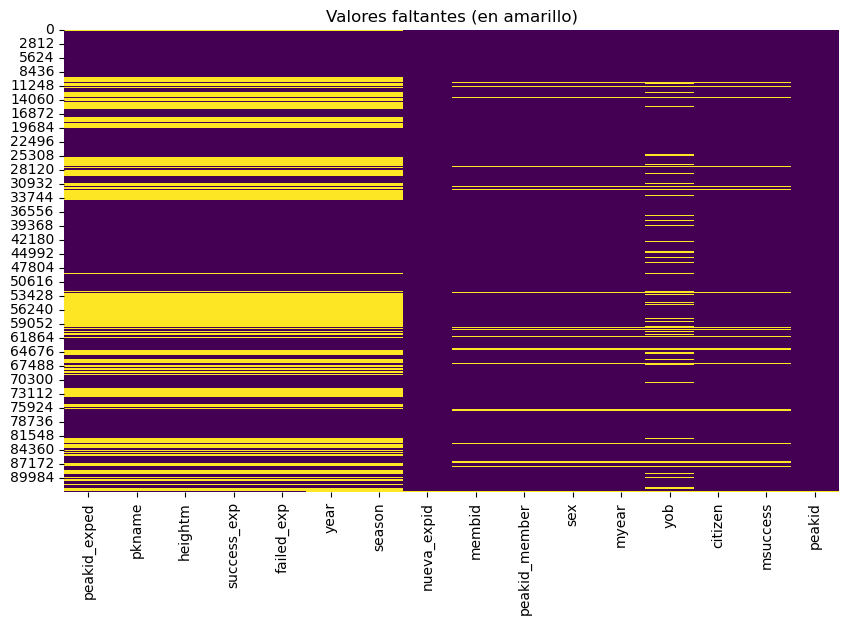

In [29]:
df = df_final

# Dibujar el mapa de calor para ver si hay valores faltantes
plt.figure(figsize=(10, 6)) 

# Usar df.isnull() para obtener un booleano (True si es NaN)
# cbar=False elimina la barra de color lateral
# cmap='viridis' usa un esquema de color que resalta los faltantes
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Valores faltantes (en amarillo)")
plt.show()

In [30]:
#ahora ya tenemos una fila de peakid sin vacíos, y podemos eliminar peakid_exped
df_final = df_final.drop(columns=["peakid_exped"])

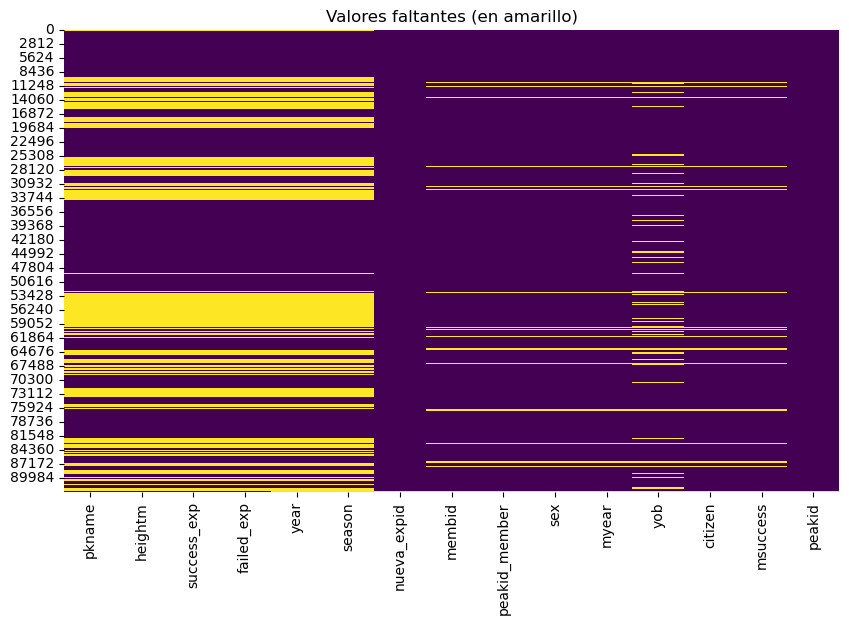

In [31]:
df = df_final

# Dibujar el mapa de calor para ver si hay valores faltantes
plt.figure(figsize=(10, 6)) 

# Usar df.isnull() para obtener un booleano (True si es NaN)
# cbar=False elimina la barra de color lateral
# cmap='viridis' usa un esquema de color que resalta los faltantes
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Valores faltantes (en amarillo)")
plt.show()

---

### merge entre df final y df_peaks para consolidar la columna pkname

In [32]:
#Ahora haremos un nuevo merge, para traer los valores de pkname desde df_peaks al df_final
df_final = pd.merge(
    df_final,                  
    df_peaks[["peakid", "pkname"]],                    
    on='peakid',            
    how='left',
    suffixes=('_final', '_peaks')
)

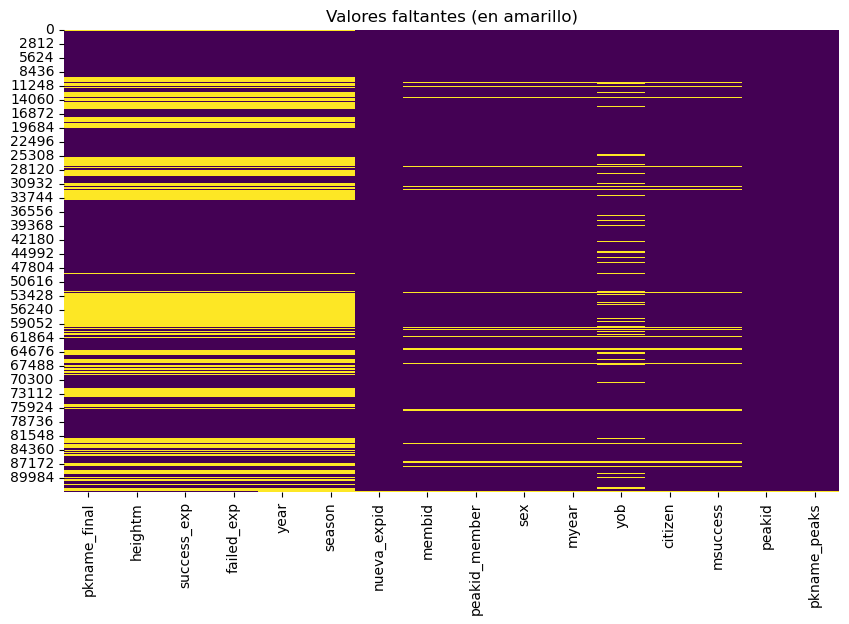

In [33]:
df = df_final

# Dibujar el mapa de calor para ver si hay valores faltantes
plt.figure(figsize=(10, 6)) 

# Usar df.isnull() para obtener un booleano (True si es NaN)
# cbar=False elimina la barra de color lateral
# cmap='viridis' usa un esquema de color que resalta los faltantes
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Valores faltantes (en amarillo)")
plt.show()

In [34]:
df_final = df_final.rename(columns={'pkname_peaks': 'pkname'})

In [35]:
#eliminamos la columna pkname_final
df_final = df_final.drop(columns=["pkname_final"])


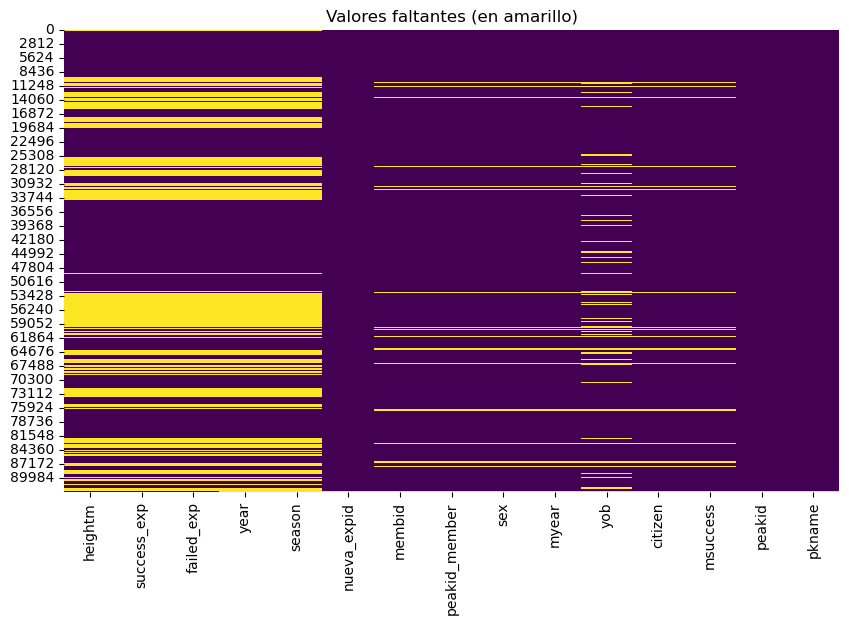

In [36]:
df = df_final

# Dibujar el mapa de calor para ver si hay valores faltantes
plt.figure(figsize=(10, 6)) 

# Usar df.isnull() para obtener un booleano (True si es NaN)
# cbar=False elimina la barra de color lateral
# cmap='viridis' usa un esquema de color que resalta los faltantes
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Valores faltantes (en amarillo)")
plt.show()

---

### Hacemos lo mismo para consolidar heightm

In [37]:
#Ahora haremos un nuevo merge, para traer los valores de heightm desde df_peaks al df_final
df_final = pd.merge(
    df_final,                  
    df_peaks[["peakid", "heightm"]],                    
    on='peakid',            
    how='left',
    suffixes=('_final', '_peaks')
)

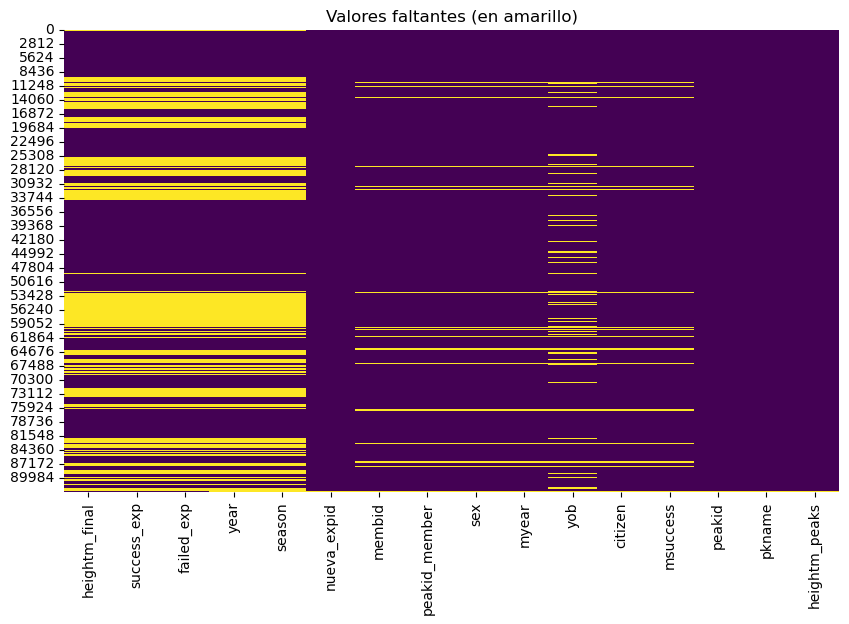

In [38]:
df = df_final

# Dibujar el mapa de calor para ver si hay valores faltantes
plt.figure(figsize=(10, 6)) 

# Usar df.isnull() para obtener un booleano (True si es NaN)
# cbar=False elimina la barra de color lateral
# cmap='viridis' usa un esquema de color que resalta los faltantes
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Valores faltantes (en amarillo)")
plt.show()

In [39]:
df_final = df_final.rename(columns={'heightm_peaks': 'heightm'})
df_final = df_final.drop(columns=["heightm_final"])


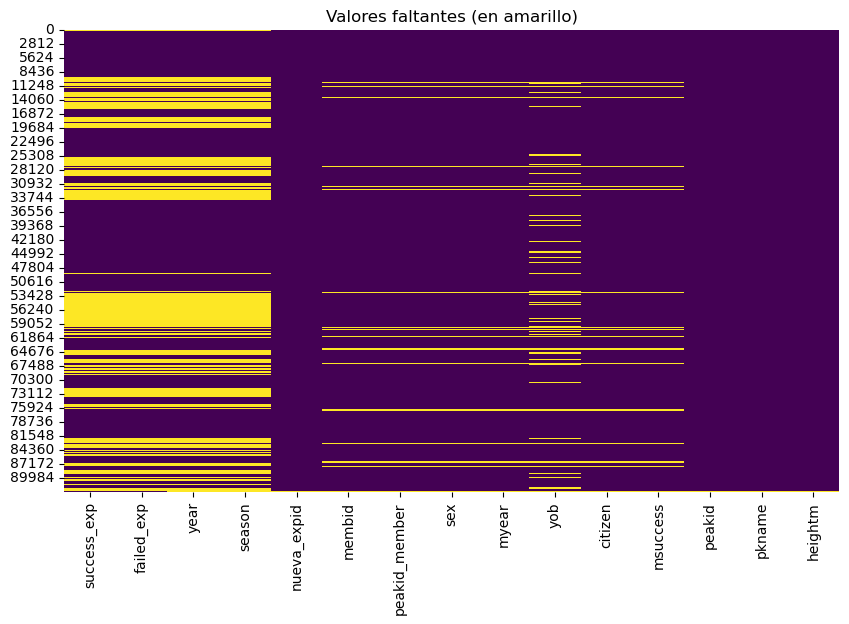

In [40]:
df = df_final

# Dibujar el mapa de calor para ver si hay valores faltantes
plt.figure(figsize=(10, 6)) 

# Usar df.isnull() para obtener un booleano (True si es NaN)
# cbar=False elimina la barra de color lateral
# cmap='viridis' usa un esquema de color que resalta los faltantes
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Valores faltantes (en amarillo)")
plt.show()

---

### Hacemos lo mismo con success_exp y failed_exp

In [41]:
df_final = pd.merge(
    df_final,                  
    df_peaks_exp[["peakid", "success_exp", "failed_exp"]],                    
    on='peakid',            
    how='left',
    suffixes=('_final', '_peaks')
)

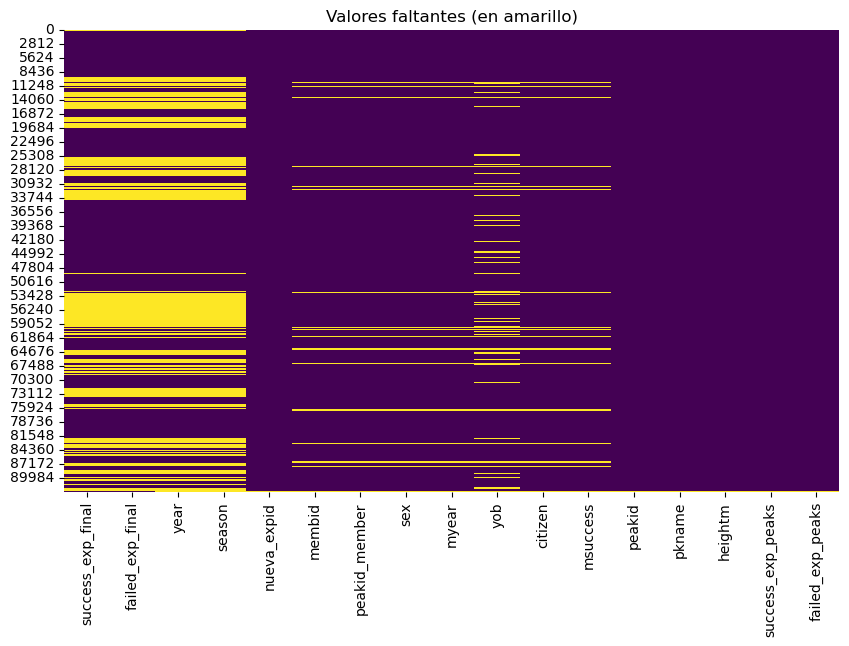

In [42]:
df = df_final

# Dibujar el mapa de calor para ver si hay valores faltantes
plt.figure(figsize=(10, 6)) 

# Usar df.isnull() para obtener un booleano (True si es NaN)
# cbar=False elimina la barra de color lateral
# cmap='viridis' usa un esquema de color que resalta los faltantes
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Valores faltantes (en amarillo)")
plt.show()

In [43]:
df_final = df_final.rename(columns={'success_exp_peaks': 'success_exp', 'failed_exp_peaks': 'failed_exp'})
df_final = df_final.drop(columns=["success_exp_final", "failed_exp_final"])

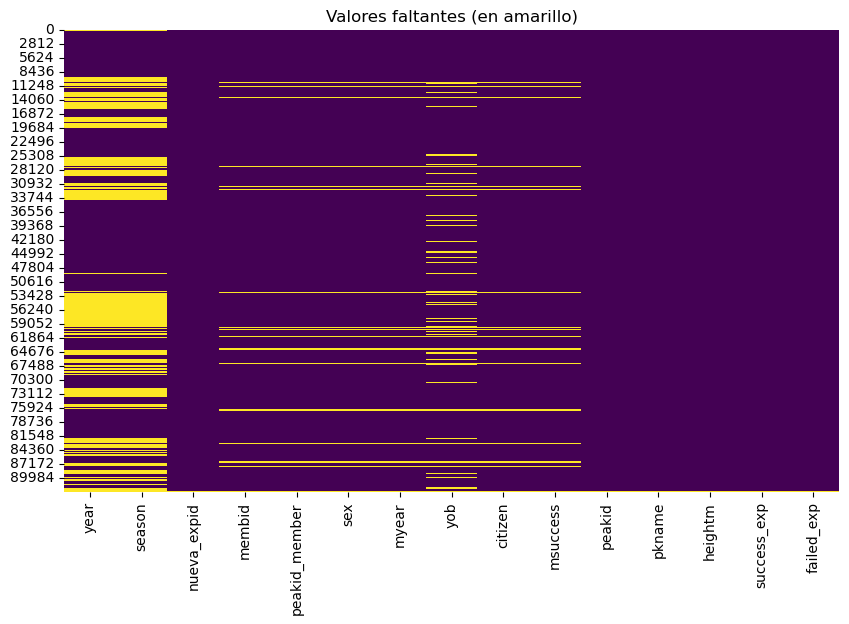

In [44]:
df = df_final

# Dibujar el mapa de calor para ver si hay valores faltantes
plt.figure(figsize=(10, 6)) 

# Usar df.isnull() para obtener un booleano (True si es NaN)
# cbar=False elimina la barra de color lateral
# cmap='viridis' usa un esquema de color que resalta los faltantes
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Valores faltantes (en amarillo)")
plt.show()

----

### Ahora con year

In [45]:
# Para year, vamos a sacar el valor del año de nueva_expid,  que se consolido anteriormente con el año
# entonces vamos a crear una nueva columna year_extraida que contenga los 4 últimos caracteres de nueva_expid
df_final["year_extraida"] = df_final["nueva_expid"].str[-4:]
#una vez que tenemos la columna con los años, podemos eliminar la columna year y renombrar year_extraida a year
df_final = df_final.drop(columns=["year"])
df_final = df_final.rename(columns={'year_extraida': 'year'})
#tambien eliminamos la columna myear pues es el mismo dato
df_final = df_final.drop(columns=["myear"])
df_final.sample(20)


season     nueva_expid  membid peakid_member  sex     yob  \
27094     NaN  CHOY94311_1970     6.0          CHOY    M     NaN   
2383   Autumn  AMAD07337_2007     3.0          AMAD    M  1979.0   
64820     NaN  KABD85101_1973     1.0          KABD    M  1944.0   
91978  Spring  TUKU16103_2016     2.0          TUKU    M  1964.0   
36558  Spring  EVER05152_2005     7.0          EVER    M  1965.0   
67138  Autumn  KCHS16301_2016     5.0          KCHS    M  1973.0   
57007  Spring  EVER93111_1993     3.0          EVER    F     NaN   
82380     NaN  MANA84102_1987     4.0          MANA    M  1959.0   
92672  Autumn  YANS03301_2003     5.0          YANS    M  1955.0   
56894  Spring  EVER93105_1993     5.0          EVER    M  1955.0   
70390  Spring  LHOT14101_2014     1.0          LHOT    M  1960.0   
66703  Autumn  KANG91302_1991     NaN           NaN  NaN     NaN   
56272     NaN  EVER91307_1993     7.0          EVER    M  1951.0   
24579  Autumn  CHOY14322_2014     1.0          CHOY    M  1960.0   
30813  Spring  DHA124102_2024     9.0          DHA1    M  1977.0   
61551     NaN  GYAJ94301_1991    13.0          GYAJ    M  1966.0   
90700  Autumn  TILI02301_2002    10.0          TILI    M  1971.0   
47060  Spring  EVER18124_2018     4.0          EVER    M  1967.0   
25928  Spring  CHOY88104_1988     NaN           NaN  NaN     NaN   
65933  Spring  KANG22102_2022    14.0          KANG    M  1997.0   

              citizen msuccess peakid          pkname  heightm  success_exp  \
27094           Nepal    False   CHOY         Cho Oyu   8188.0        861.0   
2383      Switzerland    False   AMAD      Ama Dablam   6814.0       1123.0   
64820          France     True   KABD      Kabru Dome   6600.0          3.0   
91978           Spain    False   TUKU         Tukuche   6920.0         31.0   
36558          Sweden     True   EVER         Everest   8849.0       1495.0   
67138           Nepal     True   KCHS  Kangchung Shar   6063.0          6.0   
57007           Nepal    False   EVER         Everest   8849.0       1495.0   
82380     Switzerland     True   MANA         Manaslu   8163.0        457.0   
92672              UK    False   YANS    Yansa Tsenji   6567.0          1.0   
56894             USA    False   EVER         Everest   8849.0       1495.0   
70390             USA    False   LHOT          Lhotse   8516.0        318.0   
66703             NaN      NaN   KANG   Kangchenjunga   8586.0        127.0   
56272       Australia    False   EVER         Everest   8849.0       1495.0   
24579             USA     True   CHOY         Cho Oyu   8188.0        861.0   
30813  Czech Republic    False   DHA1    Dhaulagiri I   8167.0        183.0   
61551           Japan     True   GYAJ       Gyajikang   7074.0          8.0   
90700           Nepal    False   TILI         Tilicho   7134.0         31.0   
47060       Australia     True   EVER         Everest   8849.0       1495.0   
25928             NaN      NaN   CHOY         Cho Oyu   8188.0        861.0   
65933           Nepal     True   KANG   Kangchenjunga   8586.0        127.0   

       failed_exp  year  
27094       498.0  1970  
2383        453.0  2007  
64820         5.0  1973  
91978        33.0  2016  
36558       852.0  2005  
67138         3.0  2016  
57007       852.0  1993  
82380       318.0  1987  
92672         2.0  2003  
56894       852.0  1993  
70390       194.0  2014  
66703        77.0  1991  
56272       852.0  1993  
24579       498.0  2014  
30813       241.0  2024  
61551        16.0  1991  
90700        59.0  2002  
47060       852.0  2018  
25928       498.0  1988  
65933        77.0  2022

In [46]:
#ahora actualizamos la columna nueva_expid para que solo contenga expid
df_final["nueva_expid"] = df_final["nueva_expid"].str[:-5]
df_final = df_final.rename(columns={'nueva_expid': 'expid'})
df_final.sample(20)

season      expid  membid peakid_member  sex     yob      citizen  \
1432   Autumn  AMAD05321     8.0          AMAD    M  1954.0          USA   
68195  Spring  KTUN56101     NaN           NaN  NaN     NaN          NaN   
38237  Spring  EVER07162    20.0          EVER    M  1977.0        Nepal   
83754  Autumn  NEMJ23302     3.0          NEMJ    M  1978.0       Poland   
88579     NaN  PUTH82301     1.0          PUTH    M  1929.0  Netherlands   
60705  Autumn  GHUS18301     6.0          GHUS    M  1977.0       France   
21118  Spring  CHOY05114     2.0          CHOY    M  1953.0        Italy   
9123   Autumn  AMAD23327     9.0          AMAD    F  1982.0       Russia   
65144  Spring  KANC78101     2.0          KANC    M  1949.0        Spain   
1185   Autumn  AMAD04333     9.0          AMAD    M  1968.0          USA   
76175     NaN  MAKA92303     2.0          MAKA    M  1957.0  Switzerland   
81804  Autumn  MANA23314     9.0          MANA    M  1966.0           UK   
88129  Spring  PUTH13101     3.0          PUTH    F  1970.0  Switzerland   
8481   Spring  AMAD23101     4.0          AMAD    M  1969.0       Canada   
46128  Spring  EVER17116    13.0          EVER    M  1975.0        Nepal   
74118  Autumn  MAKA08303     2.0          MAKA    M  1974.0        Nepal   
23267  Autumn  CHOY09344    12.0          CHOY    M  1959.0           UK   
84288  Autumn  NORB08301     6.0          NORB    M  1972.0        Nepal   
80105  Autumn  MANA19315    12.0          MANA    M  1979.0        Nepal   
56052     NaN  EVER91107     5.0          EVER    M  1944.0    Australia   

      msuccess peakid                 pkname  heightm  success_exp  \
1432      True   AMAD             Ama Dablam   6814.0       1123.0   
68195      NaN   KTUN          Khatung Khang   6484.0          3.0   
38237     True   EVER                Everest   8849.0       1495.0   
83754    False   NEMJ                Nemjung   7140.0          2.0   
88579    False   PUTH        Putha Hiunchuli   7246.0         67.0   
60705     True   GHUS         Ghustang South   6465.0          1.0   
21118    False   CHOY                Cho Oyu   8188.0        861.0   
9123      True   AMAD             Ama Dablam   6814.0       1123.0   
65144    False   KANC  Kangchenjunga Central   8473.0          4.0   
1185     False   AMAD             Ama Dablam   6814.0       1123.0   
76175    False   MAKA                 Makalu   8485.0        171.0   
81804    False   MANA                Manaslu   8163.0        457.0   
88129     True   PUTH        Putha Hiunchuli   7246.0         67.0   
8481     False   AMAD             Ama Dablam   6814.0       1123.0   
46128     True   EVER                Everest   8849.0       1495.0   
74118    False   MAKA                 Makalu   8485.0        171.0   
23267    False   CHOY                Cho Oyu   8188.0        861.0   
84288     True   NORB             Norbu Kang   6085.0          4.0   
80105     True   MANA                Manaslu   8163.0        457.0   
56052    False   EVER                Everest   8849.0       1495.0   

       failed_exp  year  
1432        453.0  2005  
68195         4.0  1956  
38237       852.0  2007  
83754        19.0  2023  
88579        40.0  1985  
60705         1.0  2018  
21118       498.0  2005  
9123        453.0  2023  
65144         3.0  1978  
1185        453.0  2004  
76175       212.0  1988  
81804       318.0  2023  
88129        40.0  2013  
8481        453.0  2023  
46128       852.0  2017  
74118       212.0  2008  
23267       498.0  2009  
84288         3.0  2008  
80105       318.0  2019  
56052       852.0  1993

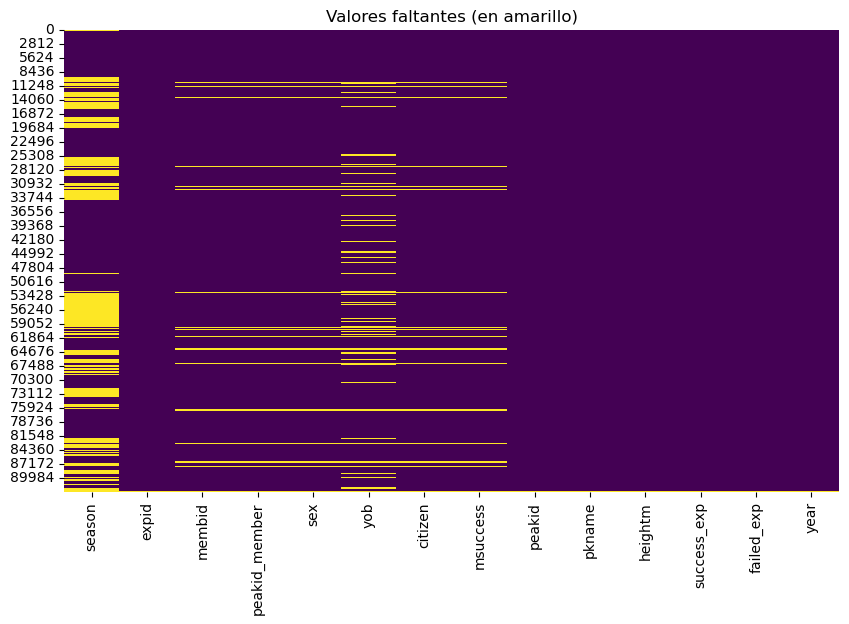

In [47]:
df = df_final

# Dibujar el mapa de calor para ver si hay valores faltantes
plt.figure(figsize=(10, 6)) 

# Usar df.isnull() para obtener un booleano (True si es NaN)
# cbar=False elimina la barra de color lateral
# cmap='viridis' usa un esquema de color que resalta los faltantes
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Valores faltantes (en amarillo)")
plt.show()

---

### Ahora hacemos merge para traernos los valores de season del dataframe df_exped

In [48]:
df_exped.head()

peakid  year  season     nueva_expid
0   ANN2  1960  Spring  ANN260101_1960
1   ANN2  1969  Autumn  ANN269301_1969
2   ANN2  1973  Spring  ANN273101_1973
3   ANN2  1978  Autumn  ANN278301_1978
4   ANN2  1979  Autumn  ANN279301_1979

### debemos limpiar primero la tabla para hacer el cruce 

In [49]:
df_exped["nueva_expid"] = df_exped["nueva_expid"].str[:-5]
#renombramos la columna nueva_expid como expid
df_exped = df_exped.rename(columns={'nueva_expid': 'expid'})
df_exped.head()

peakid  year  season      expid
0   ANN2  1960  Spring  ANN260101
1   ANN2  1969  Autumn  ANN269301
2   ANN2  1973  Spring  ANN273101
3   ANN2  1978  Autumn  ANN278301
4   ANN2  1979  Autumn  ANN279301

In [50]:
### Ahora hacemos merge para traernos los valores de season del dataframe df_exped y con la clave expid,3
 
df_final = pd.merge(
    df_final,                  
    df_exped[["expid", "season"]],                    
    on='expid',         
    how='left',
    suffixes=('_final', '_exped')
)

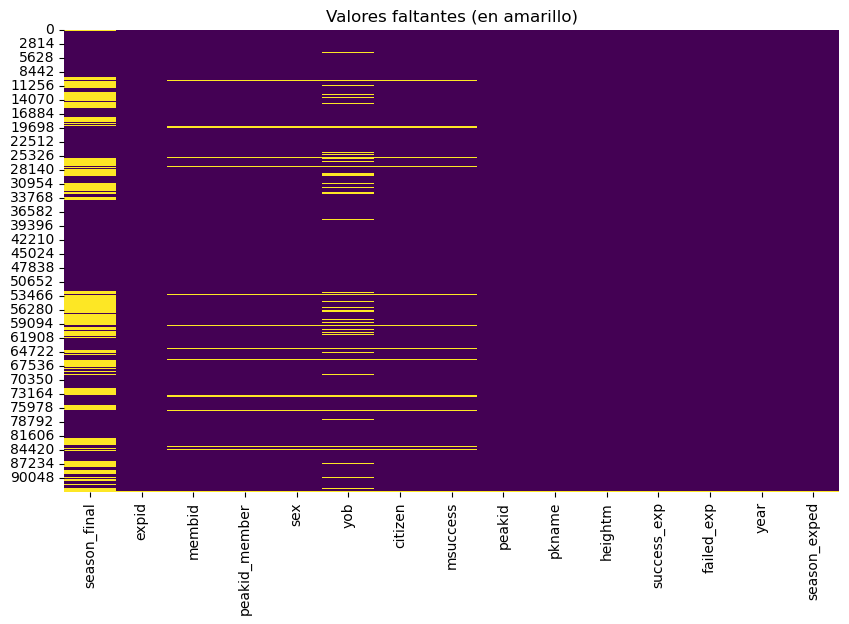

In [51]:
df = df_final

# Dibujar el mapa de calor para ver si hay valores faltantes
plt.figure(figsize=(10, 6)) 

# Usar df.isnull() para obtener un booleano (True si es NaN)
# cbar=False elimina la barra de color lateral
# cmap='viridis' usa un esquema de color que resalta los faltantes
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Valores faltantes (en amarillo)")
plt.show()

In [52]:
#finalmente renombramos season_exped solamente como season y season final la eliminamos
df_final = df_final.rename(columns={'season_exped': 'season'})
df_final = df_final.drop(columns=["season_final"])
df_final.sample(10)

expid  membid peakid_member sex     yob      citizen msuccess  \
8156   AMAD22315     8.0          AMAD   M  1961.0        Spain    False   
49495  EVER21128    13.0          EVER   M  1971.0        China    False   
48341  EVER19133     7.0          EVER   M  1990.0        India    False   
92028  TUKU14302     2.0          TUKU   M  1983.0      Germany    False   
60632  GAUR83102     4.0          GAUR   F  1952.0       Poland    False   
53194  EVER74301    15.0          EVER   M     NaN        Nepal    False   
67482  KGUR92301     5.0          KGUR   M  1957.0        Japan     True   
16511  BARU09311     4.0          BARU   M  1962.0      Germany     True   
26929  CHOY94104     5.0          CHOY   F  1951.0  Switzerland    False   
70680  LHOT15301     8.0          LHOT   M  1987.0        Nepal    False   

      peakid        pkname  heightm  success_exp  failed_exp  year  season  
8156    AMAD    Ama Dablam   6814.0       1123.0       453.0  2022  Autumn  
49495   EVER       Everest   8849.0       1495.0       852.0  2021  Spring  
48341   EVER       Everest   8849.0       1495.0       852.0  2019  Spring  
92028   TUKU       Tukuche   6920.0         31.0        33.0  2014  Autumn  
60632   GAUR  Gaurishankar   7135.0          6.0        27.0  1991  Spring  
53194   EVER       Everest   8849.0       1495.0       852.0  1982  Autumn  
67482   KGUR     Kang Guru   6981.0         18.0        13.0  1990  Autumn  
16511   BARU      Baruntse   7152.0        131.0       204.0  2009  Autumn  
26929   CHOY       Cho Oyu   8188.0        861.0       498.0  1997  Spring  
70680   LHOT        Lhotse   8516.0        318.0       194.0  2015  Autumn

In [53]:
#eliminamos peakid_member de df_final
df_final = df_final.drop(columns=["peakid_member"])

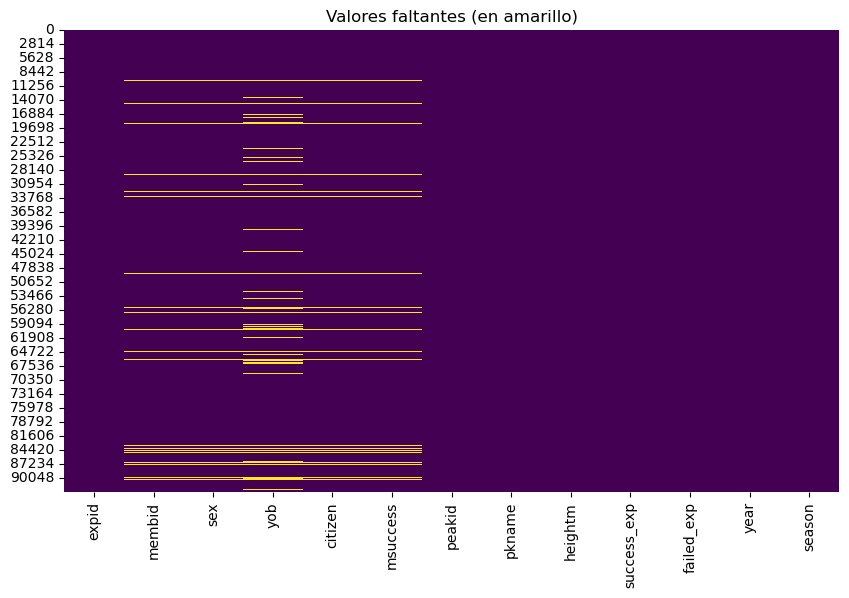

In [54]:
df = df_final

# Dibujar el mapa de calor para ver si hay valores faltantes
plt.figure(figsize=(10, 6)) 

# Usar df.isnull() para obtener un booleano (True si es NaN)
# cbar=False elimina la barra de color lateral
# cmap='viridis' usa un esquema de color que resalta los faltantes
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Valores faltantes (en amarillo)")
plt.show()

In [55]:
#buscamos en el df_final un ejemplo de la fila con valores nulos
df_final.loc[55981:55982]


expid  membid  sex     yob citizen msuccess peakid   pkname  \
55981  EVER90308     NaN  NaN     NaN     NaN      NaN   EVER  Everest   
55982  EVER90308     2.0    M  1952.0  France    False   EVER  Everest   

       heightm  success_exp  failed_exp  year  season  
55981   8849.0       1495.0       852.0  1990  Autumn  
55982   8849.0       1495.0       852.0  1993  Autumn

### Aqui encontramos el tipos de filas que tienen NaN en varias columnas

---

# <h1><center>Limpieza y Transformación </center></h1>

speccione y procese su DataFrame para generar uno nuevo llamado `clean_df`. En esta sección usted debe decidir si es necesario:

* Limpiar valores nulos, duplicados o inválidos.
* Imputar valores.
* Transformar tipos de columnas.

Justifique su procesamiento.

Primero identificamos las variables numericas :
- yob (año de nacimiento)
- heightm (altura en metros)
- success_exp (éxitos anteriores)
- failed_exp (fallos anteriores)
- year	Año de la Expedición

y las variables categóricas :
- citizen (ciudadanía)
- season (estación)
- pname (nombre del pico)

In [56]:
#primero renombramos las filas al español para que sea mas intuitivo
df_final = df_final.rename(columns={"expid":"id_expedicion","membid":"id_miembro","peakid":"id_cima","pkname":"nombre_cima","sex":"sexo","yob":"anio_nacimiento","citizen":"ciudadania","msuccess":"exito_miembro","heightm":"altura_metros","success_exp":"expediciones_exitosas","failed_exp":"expediciones_fallidas","year":"anio_expedicion","season":"estacion"})
df_final.head(3)

id_expedicion  id_miembro sexo  anio_nacimiento ciudadania exito_miembro  \
0     ACHN15301         1.0    M           1992.0      Japan          True   
1     ACHN15301         2.0    F           1992.0      Japan          True   
2     ACHN15301         4.0    M           1990.0      Japan          True   

  id_cima nombre_cima  altura_metros  expediciones_exitosas  \
0    ACHN      Aichyn         6055.0                    2.0   
1    ACHN      Aichyn         6055.0                    2.0   
2    ACHN      Aichyn         6055.0                    2.0   

   expediciones_fallidas anio_expedicion estacion  
0                    1.0            2015   Autumn  
1                    1.0            2015   Autumn  
2                    1.0            2015   Autumn

In [57]:
#vamos a transformar las columnas: la altura, el anio_acimiento, la id_miembro, las expediciones exitosas, las expediciones fallidas a tipo entero
columnas_a_entero = ["altura_metros", "anio_nacimiento", "id_miembro", "expediciones_exitosas", "expediciones_fallidas"]
for columna in columnas_a_entero:
    df_final[columna] = pd.to_numeric(df_final[columna], errors='coerce').astype('Int64')
df_final.dtypes


id_expedicion            object
id_miembro                Int64
sexo                     object
anio_nacimiento           Int64
ciudadania               object
exito_miembro            object
id_cima                  object
nombre_cima              object
altura_metros             Int64
expediciones_exitosas     Int64
expediciones_fallidas     Int64
anio_expedicion          object
estacion                 object
dtype: object

In [58]:
df_final.head()

id_expedicion  id_miembro sexo  anio_nacimiento ciudadania exito_miembro  \
0     ACHN15301           1    M             1992      Japan          True   
1     ACHN15301           2    F             1992      Japan          True   
2     ACHN15301           4    M             1990      Japan          True   
3     ACHN15301           5    M             1993      Japan          True   
4     ACHN15301           3    M             1995      Japan          True   

  id_cima nombre_cima  altura_metros  expediciones_exitosas  \
0    ACHN      Aichyn           6055                      2   
1    ACHN      Aichyn           6055                      2   
2    ACHN      Aichyn           6055                      2   
3    ACHN      Aichyn           6055                      2   
4    ACHN      Aichyn           6055                      2   

   expediciones_fallidas anio_expedicion estacion  
0                      1            2015   Autumn  
1                      1            2015   Autumn  
2                      1            2015   Autumn  
3                      1            2015   Autumn  
4                      1            2015   Autumn

In [59]:
porcentaje_faltantes = (df_final.isnull().sum() / len(df_final)) * 100
print("Porcentaje de Valores Faltantes por Columna:")
print(porcentaje_faltantes.round(1).to_string())

Porcentaje de Valores Faltantes por Columna:
id_expedicion            0.1
id_miembro               4.1
sexo                     4.1
anio_nacimiento          9.9
ciudadania               4.1
exito_miembro            4.1
id_cima                  0.1
nombre_cima              0.1
altura_metros            0.1
expediciones_exitosas    0.1
expediciones_fallidas    0.1
anio_expedicion          0.1
estacion                 0.1


### Podemos ver que que el porcentaje de datos faltantes es menor
### Primero con año de nacimiento vamos a imputar la mediana porque no afectala distribucion de los datos


In [60]:
#vamos a imputar con simpleImputer el año de nacimiento con la mediana
from sklearn.impute import SimpleImputer
#creamor el imputador de mediana
imputer = SimpleImputer(strategy='median')

#aplicamos el imputador a la columna anio_nacimiento
df_final[['anio_nacimiento']] = imputer.fit_transform(df_final[['anio_nacimiento']])
#verificamos que ya no haya valores nulos en anio_nacimiento
print(df_final['anio_nacimiento'].isnull().sum())

0


In [61]:
#como los valores de exito_miembro es booleano, vamos a imputar los valores nulos con el valor mas frecuente (la moda)
imputer_bool = SimpleImputer(strategy='most_frequent')
df_final[['exito_miembro']] = imputer_bool.fit_transform(df_final[['exito_miembro']])
print(df_final['exito_miembro'].isnull().sum())

0


In [62]:
#buscaremos las filas de las filas de la columna id_expedicion faltante que se encuentran vacias o nulas
filas_faltantes_expedicion = df_final[df_final['id_expedicion'].isnull()]
print(filas_faltantes_expedicion)


      id_expedicion  id_miembro sexo  anio_nacimiento ciudadania  \
92796           NaN        <NA>  NaN           1967.0        NaN   
92797           NaN        <NA>  NaN           1967.0        NaN   
92798           NaN        <NA>  NaN           1967.0        NaN   
92799           NaN        <NA>  NaN           1967.0        NaN   
92800           NaN        <NA>  NaN           1967.0        NaN   
...             ...         ...  ...              ...        ...   
92855           NaN        <NA>  NaN           1967.0        NaN   
92856           NaN        <NA>  NaN           1967.0        NaN   
92857           NaN        <NA>  NaN           1967.0        NaN   
92858           NaN        <NA>  NaN           1967.0        NaN   
92859           NaN        <NA>  NaN           1967.0        NaN   

      exito_miembro id_cima nombre_cima  altura_metros  expediciones_exitosas  \
92796         False     NaN         NaN           <NA>                   <NA>   
92797         False  

In [63]:
#vemos que todas las filas con id_expedicion nula tienen tambien nombre_cima nulo, por lo que eliminaremos esas filas
print(f"El total de filas de df_final antes de eliminar filas sin id_expedicion es {len(df_final)}")
a= len(df_final)
df_final = df_final[df_final['id_expedicion'].notnull()]
df_final = df_final.reset_index(drop=True)
print(f"El total de filas de df_final despues de eliminar filas sin id_expedicion es {len(df_final)}")
b= len(df_final)
c= a-b
print (f"Se eliminaron {c} filas que no tenian id_expedicion")

El total de filas de df_final antes de eliminar filas sin id_expedicion es 92860
El total de filas de df_final despues de eliminar filas sin id_expedicion es 92796
Se eliminaron 64 filas que no tenian id_expedicion


In [64]:
#comprobamos id_expedicion nulas
print(df_final['id_expedicion'].isnull().sum())

0


In [65]:
#con sexo imputamos la mas frecuente
imputer_sexo = SimpleImputer(strategy='most_frequent')
df_final[['sexo']] = imputer_sexo.fit_transform(df_final[['sexo']])
print(df_final['sexo'].isnull().sum())

0


In [66]:
#a ciudadania imputamos la mas frecuente dentro de la expedicion a la que pertenece, 
# para que tenga un valor mas ajustado, si no hay más miembros de su expedicion, 
# reemplazamos por la moda global

def imputar_ciudadania(row):   #usamos row para pasar por fila
    if pd.isnull(row['ciudadania']):  # si es nulo
        expedicion = row['id_expedicion']   #obtenemos la expedicion
        miembros_expedicion = df_final[df_final['id_expedicion'] == expedicion] #filtramos los miembros de esa expedicion
        ciudadania_moda = miembros_expedicion['ciudadania'].mode() #obtenemos la moda de ciudadania dentro de esa expedicion
        if not ciudadania_moda.empty:   #si no esta vacia
            return ciudadania_moda[0]   #devolvemos la moda
        else:   #   si no hay moda en esa expedicion
            return df_final['ciudadania'].mode()[0]  #devolvemos la moda global
    else:
        return row['ciudadania'] #si no es nulo, devolvemos el valor original
    
df_final['ciudadania'] = df_final.apply(imputar_ciudadania, axis=1)
print(f"despues de aplicar la imputacion, tenemos {df_final['ciudadania'].isnull().sum()} valores nulos en ciudadania")

despues de aplicar la imputacion, tenemos 0 valores nulos en ciudadania


In [67]:
#Comprobamos
porcentaje_faltantes = (df_final.isnull().sum() / len(df_final)) * 100
print("Porcentaje de Valores Faltantes por Columna:")
print(porcentaje_faltantes.round(1).to_string())

Porcentaje de Valores Faltantes por Columna:
id_expedicion            0.0
id_miembro               4.0
sexo                     0.0
anio_nacimiento          0.0
ciudadania               0.0
exito_miembro            0.0
id_cima                  0.0
nombre_cima              0.0
altura_metros            0.0
expediciones_exitosas    0.0
expediciones_fallidas    0.0
anio_expedicion          0.0
estacion                 0.0


### Finalmente a id de miembro lo cambiamos por el indice

In [68]:
#a la id de miembro, vamos a a transformar la columna y vamos a reemplazar sus valores por los valores del indice
df_final['id_miembro'] = df_final.index
df_final.sample(5)

id_expedicion  id_miembro sexo  anio_nacimiento ciudadania  \
51189     EVER23127       51189    M           1988.0      Nepal   
22811     CHOY08306       22811    F           1971.0     Taiwan   
18249     BAUD71101       18249    M           1967.0      Japan   
63238     HIML18314       63238    M           1963.0     France   
72635     LHOT97103       72635    M           1956.0     Russia   

      exito_miembro id_cima    nombre_cima  altura_metros  \
51189          True    EVER        Everest           8849   
22811         False    CHOY        Cho Oyu           8188   
18249         False    BAUD         Baudha           6672   
63238          True    HIML  Himlung Himal           7126   
72635          True    LHOT         Lhotse           8516   

       expediciones_exitosas  expediciones_fallidas anio_expedicion estacion  
51189                   1495                    852            2023   Spring  
22811                    861                    498            2008   Autumn  
18249                      2                      2            1971   Spring  
63238                    145                     69            2018   Autumn  
72635                    318                    194            1989   Spring

In [69]:
#Comprobamos
porcentaje_faltantes = (df_final.isnull().sum() / len(df_final)) * 100
print("Porcentaje de Datos Faltantes por Columna:")
print(porcentaje_faltantes.round(1).to_string())

Porcentaje de Datos Faltantes por Columna:
id_expedicion            0.0
id_miembro               0.0
sexo                     0.0
anio_nacimiento          0.0
ciudadania               0.0
exito_miembro            0.0
id_cima                  0.0
nombre_cima              0.0
altura_metros            0.0
expediciones_exitosas    0.0
expediciones_fallidas    0.0
anio_expedicion          0.0
estacion                 0.0


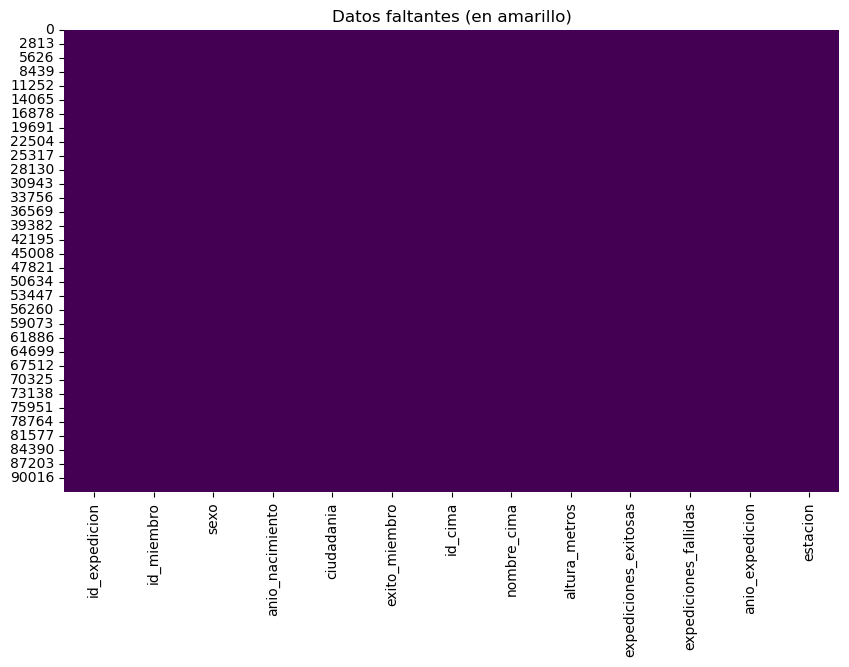

In [70]:
df = df_final

# Dibujar el mapa de calor para ver si hay valores faltantes
plt.figure(figsize=(10, 6)) 

# Usar df.isnull() para obtener un booleano (True si es NaN)
# cbar=False elimina la barra de color lateral
# cmap='viridis' usa un esquema de color que resalta los faltantes
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Datos faltantes (en amarillo)")
plt.show()

---

In [71]:
df_final.head()

id_expedicion  id_miembro sexo  anio_nacimiento ciudadania exito_miembro  \
0     ACHN15301           0    M           1992.0      Japan          True   
1     ACHN15301           1    F           1992.0      Japan          True   
2     ACHN15301           2    M           1990.0      Japan          True   
3     ACHN15301           3    M           1993.0      Japan          True   
4     ACHN15301           4    M           1995.0      Japan          True   

  id_cima nombre_cima  altura_metros  expediciones_exitosas  \
0    ACHN      Aichyn           6055                      2   
1    ACHN      Aichyn           6055                      2   
2    ACHN      Aichyn           6055                      2   
3    ACHN      Aichyn           6055                      2   
4    ACHN      Aichyn           6055                      2   

   expediciones_fallidas anio_expedicion estacion  
0                      1            2015   Autumn  
1                      1            2015   Autumn  
2                      1            2015   Autumn  
3                      1            2015   Autumn  
4                      1            2015   Autumn

### Por ultimo arreglamos los tipos de datos


In [72]:
#Por ultimo arreglamos los tipos de datos
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92796 entries, 0 to 92795
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id_expedicion          92796 non-null  object 
 1   id_miembro             92796 non-null  int64  
 2   sexo                   92796 non-null  object 
 3   anio_nacimiento        92796 non-null  float64
 4   ciudadania             92796 non-null  object 
 5   exito_miembro          92796 non-null  object 
 6   id_cima                92796 non-null  object 
 7   nombre_cima            92796 non-null  object 
 8   altura_metros          92796 non-null  Int64  
 9   expediciones_exitosas  92796 non-null  Int64  
 10  expediciones_fallidas  92796 non-null  Int64  
 11  anio_expedicion        92796 non-null  object 
 12  estacion               92796 non-null  object 
dtypes: Int64(3), float64(1), int64(1), object(8)
memory usage: 9.5+ MB


In [73]:
#vemos que anio de expedicion es object, pero año de expedicion es un valor
#cambiamos anio_expedicion a tipo entero
df_final["anio_expedicion"] = pd.to_numeric(df_final["anio_expedicion"], errors='coerce').astype('Int64')
df_final["anio_nacimiento"] = df_final["anio_nacimiento"].astype('Int64')


# la estacion tambien es object, pero son categorias
df_final["estacion"] = df_final["estacion"].astype('category')

# vemos que nombre cima es object pero son categorias, 
df_final["nombre_cima"] = df_final["nombre_cima"].astype('category')


# ciudadania tambien es object pero son categorias
df_final["ciudadania"] = df_final["ciudadania"].astype('category')

# sexo es object pero son categorias para hacer luego one hot encoding
df_final["sexo"] = df_final["sexo"].astype('category')

#  vemos que exito miembro a category
df_final["exito_miembro"] = df_final["exito_miembro"].astype('category')

df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92796 entries, 0 to 92795
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   id_expedicion          92796 non-null  object  
 1   id_miembro             92796 non-null  int64   
 2   sexo                   92796 non-null  category
 3   anio_nacimiento        92796 non-null  Int64   
 4   ciudadania             92796 non-null  category
 5   exito_miembro          92796 non-null  category
 6   id_cima                92796 non-null  object  
 7   nombre_cima            92796 non-null  category
 8   altura_metros          92796 non-null  Int64   
 9   expediciones_exitosas  92796 non-null  Int64   
 10  expediciones_fallidas  92796 non-null  Int64   
 11  anio_expedicion        92796 non-null  Int64   
 12  estacion               92796 non-null  category
dtypes: Int64(5), category(5), int64(1), object(2)
memory usage: 6.8+ MB


In [74]:
#muevo id_cima a la columna 2 y las demas columnas las dejo igual
cols = df_final.columns.tolist()
cols.insert(1, cols.pop(cols.index('id_cima')))
df_final = df_final[cols]
df_final.head()


id_expedicion id_cima  id_miembro sexo  anio_nacimiento ciudadania  \
0     ACHN15301    ACHN           0    M             1992      Japan   
1     ACHN15301    ACHN           1    F             1992      Japan   
2     ACHN15301    ACHN           2    M             1990      Japan   
3     ACHN15301    ACHN           3    M             1993      Japan   
4     ACHN15301    ACHN           4    M             1995      Japan   

  exito_miembro nombre_cima  altura_metros  expediciones_exitosas  \
0          True      Aichyn           6055                      2   
1          True      Aichyn           6055                      2   
2          True      Aichyn           6055                      2   
3          True      Aichyn           6055                      2   
4          True      Aichyn           6055                      2   

   expediciones_fallidas  anio_expedicion estacion  
0                      1             2015   Autumn  
1                      1             2015   Autumn  
2                      1             2015   Autumn  
3                      1             2015   Autumn  
4                      1             2015   Autumn

In [75]:
print(f"Resumen, finalmente imputo con moda y mediana  , y elimino solamente {c} filas")  

Resumen, finalmente imputo con moda y mediana  , y elimino solamente 64 filas


### 3.2 Creación de nuevas columnas (0.6 pts)


### Age


In [76]:
# Crea la columna 'edad' restando el anio de nacimiento  del anio de la expedición
df_final["edad"]= df_final["anio_expedicion"] - df_final["anio_nacimiento"]
df_final["edad"] = df_final["edad"].astype('Int64')
df_final.head(3)

/var/folders/2m/78v6gw9x19x1vhlbn1gn2pp40000gn/T/ipykernel_1574/206216979.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final["edad"]= df_final["anio_expedicion"] - df_final["anio_nacimiento"]
/var/folders/2m/78v6gw9x19x1vhlbn1gn2pp40000gn/T/ipykernel_1574/206216979.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final["edad"] = df_final["edad"].astype('Int64')


id_expedicion id_cima  id_miembro sexo  anio_nacimiento ciudadania  \
0     ACHN15301    ACHN           0    M             1992      Japan   
1     ACHN15301    ACHN           1    F             1992      Japan   
2     ACHN15301    ACHN           2    M             1990      Japan   

  exito_miembro nombre_cima  altura_metros  expediciones_exitosas  \
0          True      Aichyn           6055                      2   
1          True      Aichyn           6055                      2   
2          True      Aichyn           6055                      2   

   expediciones_fallidas  anio_expedicion estacion  edad  
0                      1             2015   Autumn    23  
1                      1             2015   Autumn    23  
2                      1             2015   Autumn    25

In [77]:
#veridicamos los valores unicos de edad
valores_unicos_edad = df_final['edad'].unique()
print("Valores únicos en la columna 'edad':", valores_unicos_edad)

Valores únicos en la columna 'edad': <IntegerArray>
[ 23,  25,  22,  20,  58,  54,  57,  66,  40,  60,
 ...
 -62, 102, 109, -57, 119, -51, -48, -26, -40, -39]
Length: 165, dtype: Int64


### encontramos valores negativos que no hacen sentido

In [78]:
#reemplazamos los valores negativos por nan
df_final.loc[df_final['edad'] < 0, 'edad'] = pd.NA
#imputamos la edad con la mediana
df_final[['edad']] = imputer.fit_transform(df_final[['edad']])

#verificamos valores unicos 
valores_unicos_edad = df_final['edad'].unique()
print("Valores únicos en la columna 'edad' después de la imputación:", valores_unicos_edad)

Valores únicos en la columna 'edad' después de la imputación: [ 23.  25.  22.  20.  58.  54.  57.  66.  40.  60.  41.  50.  28.  29.
  59.  32.  45.  35.  68.   7.  11.  12.   9.  33.  13.   4.  17.  38.
  18.  15.  34.   1.   3.   6.  37.   8.  31.  27.  10.   0.  26.   2.
  16.  19.   5.  14.  24.  43.  44.  30.  21.  49.  48.  36.  42.  47.
  52.  39.  51.  56.  62.  46.  53.  55.  63.  65.  73.  74.  61.  67.
  70.  75.  64.  71.  76.  69.  77.  78.  72. 101.  80.  82.  81.  83.
  86.  84. 100.  97.  85.  93.  79.  92. 114.  89. 111. 107.  98.  91.
 104.  95. 105. 103. 118.  96.  87.  88. 116.  90.  99. 102. 109. 119.]


/var/folders/2m/78v6gw9x19x1vhlbn1gn2pp40000gn/T/ipykernel_1574/2052529532.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final[['edad']] = imputer.fit_transform(df_final[['edad']])


---

### Columna agregada peak_success_p

In [79]:
#Crear `peak_success_p`: Porcentaje de expediciones exitosas de la cima respectiva.
df_final["expediciones_exitosas_p"] = (df_final["expediciones_exitosas"] / (df_final["expediciones_exitosas"] + df_final["expediciones_fallidas"])) * 100
df_final["expediciones_exitosas_p"] = df_final["expediciones_exitosas_p"].round(1)
df_final.head(3)


/var/folders/2m/78v6gw9x19x1vhlbn1gn2pp40000gn/T/ipykernel_1574/2137246483.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final["expediciones_exitosas_p"] = (df_final["expediciones_exitosas"] / (df_final["expediciones_exitosas"] + df_final["expediciones_fallidas"])) * 100
/var/folders/2m/78v6gw9x19x1vhlbn1gn2pp40000gn/T/ipykernel_1574/2137246483.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final["expediciones_exitosas_p"] = df_final["expediciones_exitosas_p"].round(1)


id_expedicion id_cima  id_miembro sexo  anio_nacimiento ciudadania  \
0     ACHN15301    ACHN           0    M             1992      Japan   
1     ACHN15301    ACHN           1    F             1992      Japan   
2     ACHN15301    ACHN           2    M             1990      Japan   

  exito_miembro nombre_cima  altura_metros  expediciones_exitosas  \
0          True      Aichyn           6055                      2   
1          True      Aichyn           6055                      2   
2          True      Aichyn           6055                      2   

   expediciones_fallidas  anio_expedicion estacion  edad  \
0                      1             2015   Autumn  23.0   
1                      1             2015   Autumn  23.0   
2                      1             2015   Autumn  25.0   

   expediciones_exitosas_p  
0                     66.7  
1                     66.7  
2                     66.7

In [80]:
#verificamos los valores unicos de expediciones_exitosas_p
valores_unicos = df_final["expediciones_exitosas_p"].unique()
print("Valores únicos en 'expediciones_exitosas_p':", valores_unicos)

Valores únicos en 'expediciones_exitosas_p': <FloatingArray>
[ 66.7,  71.3,  33.3,  75.0,  50.0, 100.0,   0.0,  38.3,  17.1,  28.9,  77.8,
  36.1,  36.8,  62.5,  39.1,  40.9,  88.9,  25.0,  39.3,  40.0,  20.0,  70.4,
  63.4,  28.6,  38.5,  80.0,  55.6,  14.3,  43.2,  23.5,  18.2,  71.4,  93.3,
  60.0,  63.7,  22.2,  15.4,  31.0,  27.3,  42.9,  26.9,  67.8,  37.5,  11.1,
  57.1,  62.3,  83.3,  58.1,  16.7,   8.3,  69.2,  41.4,  54.5,  70.0,  27.5,
  44.4,  62.1,  61.5,  44.6,  59.0,  41.7,   9.5,  46.7,  43.8,  19.4,  85.7,
  10.0,  47.1,  62.6,  30.0,  36.4,  48.1,  34.4,  28.0,  48.4]
Length: 75, dtype: Float64


---

###  ¿Cuántos ascensos exitosos y fallidos hay en su dataset? ¿A qué porcentaje del total corresponde cada categoría?


In [81]:
df_final.head(3)

id_expedicion id_cima  id_miembro sexo  anio_nacimiento ciudadania  \
0     ACHN15301    ACHN           0    M             1992      Japan   
1     ACHN15301    ACHN           1    F             1992      Japan   
2     ACHN15301    ACHN           2    M             1990      Japan   

  exito_miembro nombre_cima  altura_metros  expediciones_exitosas  \
0          True      Aichyn           6055                      2   
1          True      Aichyn           6055                      2   
2          True      Aichyn           6055                      2   

   expediciones_fallidas  anio_expedicion estacion  edad  \
0                      1             2015   Autumn  23.0   
1                      1             2015   Autumn  23.0   
2                      1             2015   Autumn  25.0   

   expediciones_exitosas_p  
0                     66.7  
1                     66.7  
2                     66.7

In [82]:
valor_exito = df_final['exito_miembro'].value_counts()
print(valor_exito)
total_miembros = valor_exito.sum()
porcentaje_exito = (valor_exito / total_miembros) * 100
print(porcentaje_exito.round(1))

exito_miembro
False    55830
True     36966
Name: count, dtype: int64
exito_miembro
False    60.2
True     39.8
Name: count, dtype: float64


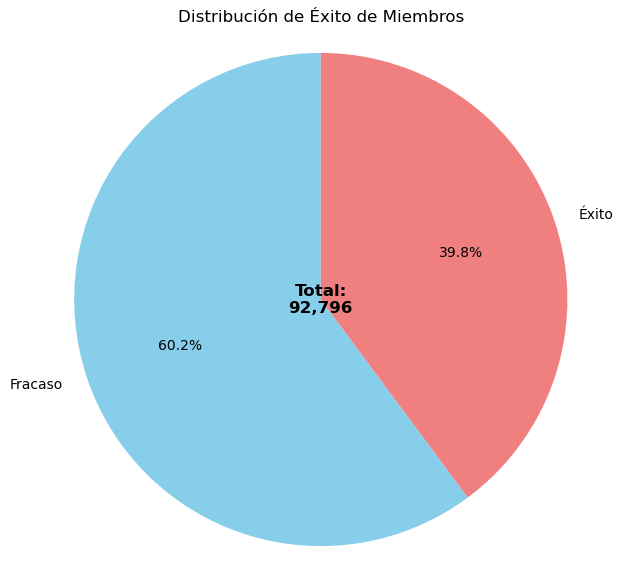

In [83]:
labels = porcentaje_exito.index.map({True: 'Éxito', False: 'Fracaso'})
sizes = porcentaje_exito.values

plt.figure(figsize=(7, 7))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%', # Muestra el porcentaje con un decimal (ej: 39.8%)
    startangle=90,
    colors=['skyblue', 'lightcoral'] # Colores opcionales para distinción
)
plt.text(
    0,                                      # Coordenada X (0 es el centro)
    0,                                      # Coordenada Y (0 es el centro)
    f'Total:\n{total_miembros:,}',          # El texto a mostrar
    ha='center',                            # Alineación horizontal: centrado
    va='center',                            # Alineación vertical: centrado
    fontsize=12,                            # Tamaño de la fuente
    fontweight='bold'                       # Fuente en negrita
)
# Título y eje igual para que sea un círculo
plt.title('Distribución de Éxito de Miembros')
plt.axis('equal') 
plt.show()


---

### b. **(0.5 pts)** ¿Cómo se distribuyen las edades de los/las montañistas en la base de datos?


In [84]:
df_final.head(3)

id_expedicion id_cima  id_miembro sexo  anio_nacimiento ciudadania  \
0     ACHN15301    ACHN           0    M             1992      Japan   
1     ACHN15301    ACHN           1    F             1992      Japan   
2     ACHN15301    ACHN           2    M             1990      Japan   

  exito_miembro nombre_cima  altura_metros  expediciones_exitosas  \
0          True      Aichyn           6055                      2   
1          True      Aichyn           6055                      2   
2          True      Aichyn           6055                      2   

   expediciones_fallidas  anio_expedicion estacion  edad  \
0                      1             2015   Autumn  23.0   
1                      1             2015   Autumn  23.0   
2                      1             2015   Autumn  25.0   

   expediciones_exitosas_p  
0                     66.7  
1                     66.7  
2                     66.7

In [85]:
conteo_edades = df_final['edad'].value_counts().sort_index()
print("Frecuencia de cada edad (Edad: Conteo):")
print(conteo_edades)

Frecuencia de cada edad (Edad: Conteo):
edad
0.0       69
1.0       78
2.0      196
3.0      252
4.0      160
        ... 
111.0      2
114.0      2
116.0      8
118.0      2
119.0      2
Name: count, Length: 112, dtype: int64


In [86]:
suma_frecuencias = conteo_edades.sum()
print(f"La suma de las frecuencias es: {suma_frecuencias}")

La suma de las frecuencias es: 92796


In [87]:
distribucion_edades = df_final['edad'].value_counts().sort_index()
edades = distribucion_edades.index
frecuencias = distribucion_edades.values

fig = px.histogram(
    df_final,
    x="edad",
    nbins=100,  # Sugerido: un número alto para que cada edad tenga su propia barra.
    title="Distribución de Edades de los Montañistas",
    labels={"edad": "Edad (años)", "count": "Frecuencia (Número de Miembros)"}
)

# 2. Ajustar el diseño y la separación de las barras.
fig.update_layout(
    bargap=0.1,
    xaxis_title="Edad (años)",
    yaxis_title="Número de Miembros (Frecuencia)"
)

# 3. Asegurar que las marcas del eje X se muestren cada 5 años.
fig.update_xaxes(dtick=5)

# 4. Establecer un rango fijo para el eje X (de 0 a 100).
fig.update_xaxes(range=[0, 100])

# 5. Mostrar la figura
fig.show()

In [88]:
fig = px.histogram(df_final, x="edad", nbins=100, title="Distribución de Edades de los Montañistas", labels={"edad": "Edad (años)"})
fig.update_layout(bargap=0.1)

#agregamos mas valores al eje x entre los rangos
fig.update_xaxes(dtick=5)

#clip a la figura y la dejamos entre 10 y 85 años
fig.update_xaxes(range=[10, 85])
fig.show()

In [89]:
#mas nbins o barras y mas dticks

fig = px.histogram(df_final, x="edad", nbins=500, title="Distribución de Edades de los Montañistas", labels={"edad": "Edad (años)"})
fig.update_layout(bargap=0.1)

#agregamos mas valores al eje x entre los rangos
fig.update_xaxes(dtick=4)

#clip a la figura y la dejamos entre 10 y 85 años
fig.update_xaxes(range=[10, 85])

#podemos agregar una linea sobre la grafica que representa la mediana
mediana_edad = df_final['edad'].median()
fig.add_vline(x=mediana_edad, line_dash="dash", line_color="red", annotation_text="Mediana", annotation_position="top right")
fig.show()


Respuesta
### Probablemente esos (mediana) sean los datos que imputé y que por esa razon están sobrerrepresentados
los valores se encuentran: 

---

# c. ¿Cómo se distribuye la cantidad de ascensos según estación del año? ¿Cuál es el porcentaje de éxito por estación? Muestre la cantidad de filas de ascensos exitosas y fallidas para cada estación.

### cantidad de ascensos por estacion del año

In [90]:

fig = px.histogram(
    df_final,
    x="estacion",
    title="Frecuencia de Ascensos por Estación del Año",
    labels={"estacion": "Estación del Año", "count": "Número de Ascensos"}
)
fig.update_layout(
    bargap=0.1,
    xaxis_title="Estación del Año",
    yaxis_title="Número de Ascensos (Frecuencia)"
)
fig.add_annotation(text=f"Total de Ascensos: {len(df_final):,}", xref="paper", yref="paper", x=1.0, y=1.05, showarrow=False, font=dict(size=12))
fig.show()

In [91]:
df_final.head(3)

id_expedicion id_cima  id_miembro sexo  anio_nacimiento ciudadania  \
0     ACHN15301    ACHN           0    M             1992      Japan   
1     ACHN15301    ACHN           1    F             1992      Japan   
2     ACHN15301    ACHN           2    M             1990      Japan   

  exito_miembro nombre_cima  altura_metros  expediciones_exitosas  \
0          True      Aichyn           6055                      2   
1          True      Aichyn           6055                      2   
2          True      Aichyn           6055                      2   

   expediciones_fallidas  anio_expedicion estacion  edad  \
0                      1             2015   Autumn  23.0   
1                      1             2015   Autumn  23.0   
2                      1             2015   Autumn  25.0   

   expediciones_exitosas_p  
0                     66.7  
1                     66.7  
2                     66.7

# cantidad de ascensos fallidos y existosos por estacion

In [92]:
# Agrupar por 'estacion' y 'exito_miembro' y contar la frecuencia.
df_ascensos_por_estacion = df_final.groupby(['estacion', 'exito_miembro'], observed= True).size().unstack(fill_value=0)

# Renombrar las columnas (False es Fallido, True es Exitoso)
df_ascensos_por_estacion.columns = ['Ascensos_Fallidos', 'Ascensos_Exitosos']

# Calcular totales y porcentaje (opcional, pero útil para el análisis)
df_ascensos_por_estacion['Total_Ascensos'] = df_ascensos_por_estacion['Ascensos_Fallidos'] + df_ascensos_por_estacion['Ascensos_Exitosos']
df_ascensos_por_estacion['Porcentaje_Exito'] = ((df_ascensos_por_estacion['Ascensos_Exitosos'] / df_ascensos_por_estacion['Total_Ascensos']) * 100).round(1)

df_ascensos_por_estacion.head(5)

Ascensos_Fallidos  Ascensos_Exitosos  Total_Ascensos  \
estacion                                                         
Autumn                27421              16493           43914   
Spring                25855              19713           45568   
Summer                  628                208             836   
Unknown                   2                  0               2   
Winter                 1924                552            2476   

          Porcentaje_Exito  
estacion                    
Autumn                37.6  
Spring                43.3  
Summer                24.9  
Unknown                0.0  
Winter                22.3

In [93]:
fig = px.histogram(
    df_final, 
    x="estacion", 
    color="exito_miembro", # Usa el color para distinguir Exitoso (True) de Fallido (False)
    barmode="group",        # Asegura que las barras True y False estén una al lado de la otra
    title="Ascensos Exitosos y Fallidos por Estación del Año",
    labels={
        "estacion": "Estación del Año", 
        "count": "Número de Ascensos",
        "exito_miembro": "Resultado del Ascenso"
    },
    # Asignación de colores opcional para mayor claridad
    color_discrete_map={True: 'green', False: 'red'}
)

# 2. Ajustar el diseño del gráfico
fig.update_layout(
    bargap=0.15, # Espacio entre los grupos de barras
    xaxis={'categoryorder':'array', 'categoryarray':['Spring', 'Summer', 'Autumn', 'Winter']} # Ordenar las estaciones
)

fig.show()

Tenemos que tanto en primavera y otoño hay mas fallidos que exitos, y  hay mas ascensos totales en primavera

### porcentaje de exito por estacion

In [94]:

df_plot = df_ascensos_por_estacion.reset_index()
# 2. Crear el gráfico de barras
fig = px.bar(
    df_plot,
    x='estacion',
    y='Porcentaje_Exito',
    title='Porcentaje de Éxito de Ascensos por Estación',
    labels={
        "estacion": "Estación del Año",
        "Porcentaje_Exito": "Porcentaje de Éxito (%)"
    },
    # Usar el color para codificar el valor del porcentaje
    color='Porcentaje_Exito', 
    color_continuous_scale=px.colors.sequential.Viridis,
    # Mostrar el valor del porcentaje sobre cada barra
    text='Porcentaje_Exito' 
)

# 3. Ajustes al layout y etiquetas de texto
fig.update_traces(texttemplate='%{text}%', textposition='outside')
fig.update_yaxes(range=[0, df_plot['Porcentaje_Exito'].max() * 1.1]) # Ajustar el eje Y

# Opcional: Ordenar las estaciones en un orden lógico (primavera, verano, etc.)
estaciones_orden = ['Spring', 'Summer', 'Autumn', 'Winter']
fig.update_xaxes(categoryorder='array', categoryarray=estaciones_orden)

fig.show()

In [95]:
import plotly.graph_objects as go
df_ascensos_por_estacion_filtrado = df_ascensos_por_estacion.drop('Unknown', errors='ignore')

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=df_ascensos_por_estacion_filtrado.index, # Usamos el DataFrame filtrado
    y=df_ascensos_por_estacion_filtrado["Porcentaje_Exito"],
    mode='lines+markers',
    name="Porcentaje de Éxito",
    line=dict(color='blue')
))

max_pct = df_ascensos_por_estacion_filtrado["Porcentaje_Exito"].max() if not df_ascensos_por_estacion_filtrado.empty else 100
y_range_max = max_pct * 1.1 if max_pct < 100 else 100
if y_range_max == 0: y_range_max = 100 # Asegurar un rango si todos los porcentajes son 0

fig.update_layout(
    title="Porcentaje de Éxito por Estación del Año (Excluyendo Desconocido)",
    xaxis_title="Estación del Año",
    yaxis_title="Porcentaje de Éxito (%)",
    yaxis_range=[0, y_range_max]
)

fig.show()

---

d. **(0.5 pts)** ¿Cómo cambia la cantidad de ascensos en el tiempo? Muestre la cantidad de ascensos exitosos y fallidos por año.

### Como cambia la cantidad de ascensos en el tiempo


anio_expedicion
1905      10
1907       3
1909       4
1910       7
1920       8
        ... 
2020     239
2021    2187
2022    3317
2023    3493
2024    1718
Name: count, Length: 97, dtype: Int64


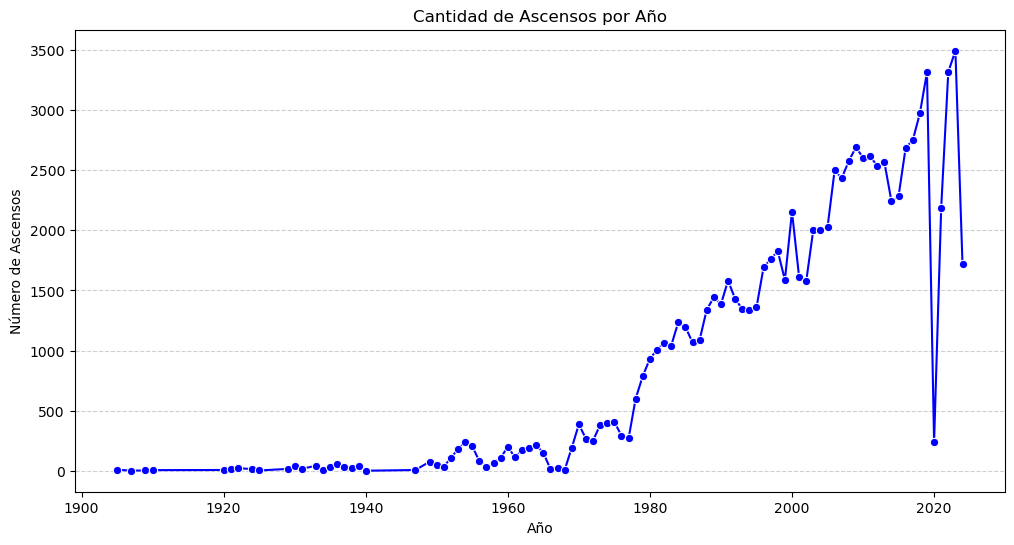

In [96]:
ascensos_por_anyo = df_final['anio_expedicion'].value_counts().sort_index()
print(ascensos_por_anyo)

plt.figure(figsize=(12, 6))
sns.lineplot(x=ascensos_por_anyo.index, y=ascensos_por_anyo.values, marker='o', color='blue')

plt.title('Cantidad de Ascensos por Año')
plt.xlabel('Año')
plt.ylabel('Número de Ascensos')
plt.grid(axis='y', linestyle='--', alpha=0.6) 

### Cantidad de ascensos exitosos y fallidos por año

In [97]:
# Agrupar por 'anio_expedicion' y 'exito_miembro' y contar la frecuencia.
df_ascensos_por_anio = df_final.groupby(['anio_expedicion', 'exito_miembro']).size().unstack(fill_value=0)

# Renombrar las columnas (False es Fallido, True es Exitoso)
df_ascensos_por_anio.columns = ['Ascensos_Fallidos', 'Ascensos_Exitosos']

# Calcular el total de ascensos por año
df_ascensos_por_anio['Total_Ascensos'] = df_ascensos_por_anio['Ascensos_Fallidos'] + df_ascensos_por_anio['Ascensos_Exitosos']

# Opcional: Calcular el porcentaje de éxito por año
df_ascensos_por_anio['Porcentaje_Exito'] = ((df_ascensos_por_anio['Ascensos_Exitosos'] / df_ascensos_por_anio['Total_Ascensos']) * 100).round(1)

print("Ascensos por Año de Expedición:")
print(df_ascensos_por_anio)

Ascensos por Año de Expedición:
                 Ascensos_Fallidos  Ascensos_Exitosos  Total_Ascensos  \
anio_expedicion                                                         
1905                            10                  0              10   
1907                             3                  0               3   
1909                             4                  0               4   
1910                             6                  1               7   
1920                             6                  2               8   
...                            ...                ...             ...   
2020                            46                193             239   
2021                          1128               1059            2187   
2022                          1370               1947            3317   
2023                          1138               2355            3493   
2024                           456               1262            1718   

                 P

/var/folders/2m/78v6gw9x19x1vhlbn1gn2pp40000gn/T/ipykernel_1574/1391327188.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [98]:
# Crear el gráfico de barras agrupadas.
# Usamos el DataFrame original (df_final) y Plotly cuenta por nosotros.
fig = px.histogram(
    df_final, 
    x="anio_expedicion", 
    color="exito_miembro", 
    barmode="group",        
    title="Ascensos Exitosos y Fallidos por Año de Expedición",
    labels={
        "anio_expedicion": "Año de la Expedición", 
        "count": "Número de Ascensos",
        "exito_miembro": "Resultado del Ascenso"
    },
    color_discrete_map={True: 'green', False: 'red'}
)

# Ajustar las etiquetas del eje X para que muestren los años claramente
fig.update_xaxes(type='category') 
fig.update_xaxes(categoryorder='category ascending')
# Añadir la etiqueta de Total de Ascensos (Total de filas en df_final)
fig.add_annotation(
    text=f"Total General de Ascensos: {len(df_final):,}", 
    xref="paper", yref="paper", x=1.0, y=1.05, 
    showarrow=False, 
    font=dict(size=12)
)

fig.show()

In [99]:
df_final.head(2)

id_expedicion id_cima  id_miembro sexo  anio_nacimiento ciudadania  \
0     ACHN15301    ACHN           0    M             1992      Japan   
1     ACHN15301    ACHN           1    F             1992      Japan   

  exito_miembro nombre_cima  altura_metros  expediciones_exitosas  \
0          True      Aichyn           6055                      2   
1          True      Aichyn           6055                      2   

   expediciones_fallidas  anio_expedicion estacion  edad  \
0                      1             2015   Autumn  23.0   
1                      1             2015   Autumn  23.0   

   expediciones_exitosas_p  
0                     66.7  
1                     66.7

In [100]:
# 1. Identificar picos frecuentes (los que tienen 10 o más apariciones)
picos_frecuentes = df_final['nombre_cima'].value_counts()
picos_frecuentes = picos_frecuentes[picos_frecuentes >= 10].index

# 2. Filtrar el DataFrame a solo esos picos
df_filtrado_picos = df_final[df_final['nombre_cima'].isin(picos_frecuentes)].copy()

# 3. Calcular el porcentaje de éxito para CADA CIMA
# Agrupar por nombre_cima
df_resumen_cima = df_filtrado_picos.groupby('nombre_cima').agg(
    altura_metros=('altura_metros', 'first'), # Tomar la altura, asumiendo que es la misma para cada cima
    exito_total=('exito_miembro', lambda x: (x == True).sum()), # Contar True
    fallo_total=('exito_miembro', lambda x: (x == False).sum()) # Contar False
).reset_index()

df_resumen_cima['total_expediciones'] = df_resumen_cima['exito_total'] + df_resumen_cima['fallo_total']
df_resumen_cima['expediciones_exitosas_p'] = (df_resumen_cima['exito_total'] / df_resumen_cima['total_expediciones'] * 100).round(2)

# Filtrar nuevamente para eliminar cimas con 0 expediciones (si las hubiera después del cálculo)
df_resumen_cima = df_resumen_cima[df_resumen_cima['total_expediciones'] > 0]


# --- 2. Creación del Scatterplot con Plotly Graph Objects (go) ---

fig = go.Figure()

# Añadir un rastro de dispersión para cada cima
fig.add_trace(go.Scatter(
    x=df_resumen_cima['altura_metros'],
    y=df_resumen_cima['expediciones_exitosas_p'],
    mode='markers', # Solo marcadores (puntos)
    marker=dict(
        size=10,
        opacity=0.8,
        line=dict(width=1, color='DarkSlateGrey')
    ),
    text=df_resumen_cima['nombre_cima'], # Para mostrar el nombre de la cima al pasar el ratón
    hovertemplate='<b>Cima:</b> %{text}<br>' +
                  '<b>Altura:</b> %{x:.0f} m<br>' +
                  '<b>Éxito:</b> %{y:.1f}%<extra></extra>',
    name="Cima" # Nombre para la leyenda si hubiera varios rastros
))

# Actualizar el layout del gráfico
fig.update_layout(
    title='Correlación entre Altura de Cumbre y Porcentaje de Éxito',
    xaxis_title='Altura de la Cumbre (m)',
    yaxis_title='Porcentaje de Éxito (%)',
    hovermode="closest", # Resalta el punto más cercano al cursor
    showlegend=False # No necesitamos leyenda si todos los puntos son del mismo rastro
)

fig.show()

/var/folders/2m/78v6gw9x19x1vhlbn1gn2pp40000gn/T/ipykernel_1574/4174454644.py:10: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



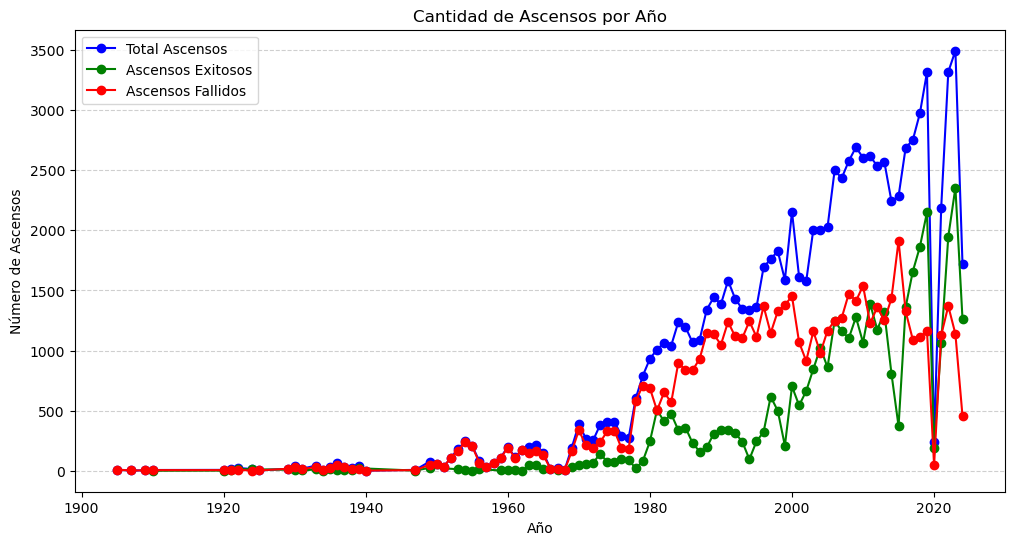

In [101]:
### Cantidad de ascensos exitosos y fallidos por año con matplotlib
ascensos_por_anio = df_final['anio_expedicion'].value_counts().sort_index()
ascensos_exitosos_por_anio = df_final[df_final['exito_miembro'] == True]['anio_expedicion'].value_counts().sort_index()
ascensos_fallidos_por_anio = df_final[df_final['exito_miembro'] == False]['anio_expedicion'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
plt.plot(ascensos_por_anio.index, ascensos_por_anio.values, marker='o', label='Total Ascensos', color='blue')
plt.plot(ascensos_exitosos_por_anio.index, ascensos_exitosos_por_anio.values, marker='o', label='Ascensos Exitosos', color='green')
plt.plot(ascensos_fallidos_por_anio.index, ascensos_fallidos_por_anio.values, marker='o', label='Ascensos Fallidos', color='red')
plt.title('Cantidad de Ascensos por Año')
plt.xlabel('Año')
plt.ylabel('Número de Ascensos')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()




In [102]:
# Asegúrate de que df_resumen_cima tenga las columnas requeridas (altura_metros y expediciones_exitosas_p)

# Opción 1: Correlación entre dos columnas específicas (Recomendado)
correlacion = df_resumen_cima['altura_metros'].corr(df_resumen_cima['expediciones_exitosas_p'])
print("\n")
print(f"La correlación de Pearson entre Altura y Porcentaje de Éxito es: {correlacion:.4f}")



La correlación de Pearson entre Altura y Porcentaje de Éxito es: -0.3088


### En promedio, a medida que la altura de la cumbre (eje X) aumenta, el porcentaje de éxito de las expediciones tiende a disminuir (eje Y).

### Generalmente, valores entre 0.30 y 0.49 se consideran de fuerza débil a moderada.Esto quiere decir que, si bien existe una tendencia a que el éxito disminuya con la altura, la relación no es muy fuerte ni perfecta. Hay muchos otros factores (como el clima, la experiencia del equipo, el año de la expedición, etc.) que influyen en el porcentaje de éxito

### Estas dos cosas componen la correlacion de Pearson, sentido y fuerza

---

## 5. Predictor (2.5 puntos)

###    **5.1 Codificación y normalización (1 pto)**
###    * Codifique todas las columnas categóricas, de manera que su matriz **X** solo tenga valores numéricos.
  ###  * Divida sus datos en sets de entrenamiento y testeo. Use una división de 70-30.
### * Normalice sus matrices de atributos. Justifique su método de normalización.


In [103]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92796 entries, 0 to 92795
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   id_expedicion            92796 non-null  object  
 1   id_cima                  92796 non-null  object  
 2   id_miembro               92796 non-null  int64   
 3   sexo                     92796 non-null  category
 4   anio_nacimiento          92796 non-null  Int64   
 5   ciudadania               92796 non-null  category
 6   exito_miembro            92796 non-null  category
 7   nombre_cima              92796 non-null  category
 8   altura_metros            92796 non-null  Int64   
 9   expediciones_exitosas    92796 non-null  Int64   
 10  expediciones_fallidas    92796 non-null  Int64   
 11  anio_expedicion          92796 non-null  Int64   
 12  estacion                 92796 non-null  category
 13  edad                     92796 non-null  float64 
 14  expedi

In [104]:
#Ahora veremos si la información que tenemos nos permite predecir el éxito de un ascenso por alguna persona en particular. Primero, defina su **X** (matriz de atributos) e **y** (etiqueta a predecir) de la siguiente manera:

#* **X**: 
#* **y**: `msuccess`

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Asumo que las columnas de df_final ya fueron renombradas a estos nombres en español:
# 'edad', 'sexo', 'ciudadania', 'estacion', 'altura_metros', 'anio_expedicion', 
# 'expediciones_exitosas', 'expediciones_fallidas', 'exito_miembro' (msuccess)

# 1. Definición de las variables predictoras (X) y la variable objetivo (y)
# Reemplazando 'age', 'sex', 'citizen', 'season', 'heightm', 'year', 'success_exp', 'failed_exp'
# por: 'edad', 'sexo', 'ciudadania', 'estacion', 'altura_metros', 'anio_expedicion', 
# 'expediciones_exitosas', 'expediciones_fallidas'

X = df_final[[
    "edad", 
    "sexo", 
    "ciudadania", 
    "estacion", 
    "altura_metros", 
    "anio_expedicion", 
    "expediciones_exitosas", 
    "expediciones_fallidas"
]].copy()

# Reemplazando 'msuccess' por 'exito_miembro'
y = df_final["exito_miembro"]


# --- 2. Label Encoding para 'sexo' (Variable Binaria) ---
# Inicializar el codificador
le = LabelEncoder()

# Aplicar Label Encoding a la columna 'sexo'
# Esto transformará las categorías presentes a 0 y 1.
X['sexo'] = le.fit_transform(X['sexo'])


# --- 3. Codificación de columnas categóricas (One-Hot Encoding) ---
# Se codifican las variables nominales: 'ciudadania' y 'estacion'
X_encoded = pd.get_dummies(
    X, 
    columns=['ciudadania', 'estacion'], 
    drop_first=True
)

# 4. Verificación
print("\n")
print("Columnas de X codificada (todas numéricas):\n", X_encoded.columns.tolist())
print("\n")





Columnas de X codificada (todas numéricas):
 ['edad', 'sexo', 'altura_metros', 'anio_expedicion', 'expediciones_exitosas', 'expediciones_fallidas', 'ciudadania_Afghanistan/USA', 'ciudadania_Albania', 'ciudadania_Algeria', 'ciudadania_Andorra', 'ciudadania_Argentina', 'ciudadania_Argentina/Canada', 'ciudadania_Armenia', 'ciudadania_Australia', 'ciudadania_Australia/Greece', 'ciudadania_Australia/Ireland', 'ciudadania_Australia/New Zealand', 'ciudadania_Australia/S Africa', 'ciudadania_Australia/Sweden', 'ciudadania_Australia/UK', 'ciudadania_Australia/USA', 'ciudadania_Austria', 'ciudadania_Austria/Brazil', 'ciudadania_Azerbaijan', 'ciudadania_Azerbaijan/Russia', 'ciudadania_Bahrain', 'ciudadania_Bangladesh', 'ciudadania_Belarus', 'ciudadania_Belgium', 'ciudadania_Bhutan', 'ciudadania_Bolivia', 'ciudadania_Bosnia-Herzegovina', 'ciudadania_Bosnia-Herzegovina/USA', 'ciudadania_Botswana', 'ciudadania_Brazil', 'ciudadania_Bulgaria', 'ciudadania_Canada', 'ciudadania_Canada/Ireland', 'ciuda

In [105]:
#* Divida sus datos en sets de entrenamiento y testeo. Use una división de 70-30.
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)
print(f"Tamaño de X_train: {X_train.shape}, Tamaño de y_train: {y_train.shape}")

Tamaño de X_train: (64957, 261), Tamaño de y_train: (64957,)


In [106]:
print(X_train.dtypes)

edad                     float64
sexo                       int64
altura_metros              Int64
anio_expedicion            Int64
expediciones_exitosas      Int64
                          ...   
ciudadania_Yugoslavia       bool
estacion_Spring             bool
estacion_Summer             bool
estacion_Unknown            bool
estacion_Winter             bool
Length: 261, dtype: object


In [107]:
# Normalice sus matrices de atributos. Justifique su método de normalización.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

# 2. Transformar X_train y X_test
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. VERIFICACIÓN: Imprimir la media y desviación estándar del conjunto de entrenamiento
# El StandardScaler busca que la media sea casi 0 y la desviación estándar sea casi 1.
print("--- Verificación de la Estandarización ---")
print(f"Media de X_train_scaled (debe ser ≈ 0):\n{np.mean(X_train_scaled, axis=0)}")
print(f"Desv. Estándar de X_train_scaled (debe ser ≈ 1):\n{np.std(X_train_scaled, axis=0)}")

--- Verificación de la Estandarización ---
Media de X_train_scaled (debe ser ≈ 0):
[-2.71716390e-16  1.70861917e-16  7.39453622e-17 -4.69115504e-15
  3.67539078e-17 -1.05011165e-17  8.75093044e-19  2.62527913e-18
 -1.09386631e-18  4.81301174e-18  1.61892213e-17  1.75018609e-18
 -1.53141283e-18  3.41286287e-17  1.31263957e-18 -3.06282565e-18
  2.62527913e-18  4.37546522e-19 -5.03178500e-18  1.09386631e-18
  8.75093044e-19  6.31160858e-17  8.75093044e-19  2.18773261e-18
  9.18847696e-18 -7.43829087e-18 -1.24700759e-17 -1.03917299e-17
  3.46755619e-17  0.00000000e+00  2.18773261e-19 -5.68810479e-18
 -6.12565131e-18  0.00000000e+00 -2.07834598e-18 -2.93156170e-17
  1.48765817e-17 -2.18773261e-19 -1.96895935e-18  0.00000000e+00
  0.00000000e+00  8.75093044e-19  2.18773261e-19  1.34545556e-17
  0.00000000e+00 -4.26607859e-17  4.37546522e-19  4.37546522e-19
 -8.75093044e-18  3.28159892e-18  0.00000000e+00  7.87583740e-18
  0.00000000e+00  2.84405239e-18 -4.37546522e-18  7.63518681e-17
  2.734

### **5.2 Creación y entrenamiento de modelos (1 pto)**
* Cree y entrene los siguientes modelos:
    * Un clasificador KNN
    * Un árbol de decisión
    * Un clasificador de regresión logística
    * Un clasificador random forest **(Opcional)**

    Explique qué hiperparámetros utilizó para la creación de cada uno de ellos y qué valores le asignó.

Hiperparámetros de Modelos (Texto Plano)
1. Clasificador K-Nearest Neighbors (KNN)
n_neighbors (Número de vecinos): 5.

Significado: Número de puntos de datos más cercanos a considerar para la votación de clasificación.

metric (Métrica de distancia): 'minkowski'.

Significado: La métrica utilizada para calcular la distancia entre puntos (Euclidiana por defecto).

2. Árbol de Decisión
criterion (Criterio de división): 'gini'.

Significado: Función utilizada para medir la calidad de una división (cuán 'puros' son los nodos hijos).

max_depth (Profundidad máxima): 10.

Significado: Límite en la profundidad del árbol para controlar la complejidad y prevenir el overfitting.

random_state (Semilla): 42.

Significado: Semilla para el generador de números aleatorios, asegurando la reproducibilidad del resultado.

3. Clasificador de Regresión Logística
penalty (Penalización/Regularización): 'l2'.

Significado: Tipo de regularización aplicada (Ridge) para prevenir el overfitting reduciendo la magnitud de los coeficientes.

C (Fuerza de regularización): 1.0.

Significado: Es el inverso de la fuerza de regularización. Valores más pequeños significan una regularización más fuerte.

solver (Algoritmo de optimización): 'liblinear'.

Significado: Algoritmo usado para encontrar los coeficientes óptimos.

random_state (Semilla): 42.

4. Clasificador Random Forest (Opcional)
n_estimators (Número de estimadores): 100.

Significado: Cantidad de árboles de decisión que se construirán en el 'bosque'.

max_depth (Profundidad máxima): 10.

Significado: Límite en la profundidad de cada árbol individual dentro del bosque.

random_state (Semilla): 42.

In [108]:
from sklearn.neighbors import KNeighborsClassifier

# Crear el modelo KNN con 5 vecinos
knn_model = KNeighborsClassifier(n_neighbors=5, metric='minkowski')

# Entrenar el modelo
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [109]:
from sklearn.tree import DecisionTreeClassifier

# Crear el modelo de Árbol de Decisión
tree_model = DecisionTreeClassifier(
    criterion='gini',
    max_depth=10, 
    random_state=42
)

# Entrenar el modelo
tree_model.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [110]:
from sklearn.linear_model import LogisticRegression

# Crear el modelo de Regresión Logística
logreg_model = LogisticRegression(
    penalty='l2',
    C=1.0, 
    solver='liblinear',
    random_state=42
)

# Entrenar el modelo
logreg_model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [111]:
from sklearn.ensemble import RandomForestClassifier

# Crear el modelo Random Forest
forest_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10, 
    random_state=42
)

# Entrenar el modelo
forest_model.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

---

* Finalmente, evalúe todos sus modelos con el set de testeo. Para cada uno, muestre
    * Accuracy
    * Precisión
    * Recall
    * Matriz de confusión

In [112]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# --- MODELOS ENTRENADOS (ASUMIDOS) ---
# Sustituye estas líneas con tus modelos ya entrenados:
# knn_model, tree_model, logreg_model, forest_model

# Creamos un diccionario para mapear el nombre del modelo a su objeto
models = {
    "KNN": knn_model,
    "Árbol de Decisión": tree_model,
    "Regresión Logística": logreg_model,
    "Random Forest": forest_model
}

# Diccionario para almacenar los resultados
results = {}

print("--- 📊 Resultados de la Evaluación en el Set de Testeo ---")
print("-" * 50)

# Evaluar cada modelo
for name, model in models.items():
    # 1. Realizar predicciones
    y_pred = model.predict(X_test_scaled)
    
    # 2. Calcular métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # 3. Almacenar resultados
    results[name] = {
        "Accuracy": accuracy,
        "Precisión": precision,
        "Recall": recall,
        "Matriz de Confusión": conf_matrix
    }

    # 4. Mostrar resultados en consola
    print(f"## Modelo: {name}")
    print(f"   Accuracy: {accuracy:.4f}")
    print(f"   Precisión: {precision:.4f}")
    print(f"   Recall (Sensibilidad): {recall:.4f}")
    print("\n   Matriz de Confusión:")
    print(f"     [VP(True Pos) | FN(False Neg)]")
    print(f"     [FP(False Pos) | VN(True Neg)]")
    print(conf_matrix)
    print("-" * 50)

# Opcional: Mostrar tabla resumen de métricas
results_df = pd.DataFrame({
    'Modelo': list(results.keys()),
    'Accuracy': [r['Accuracy'] for r in results.values()],
    'Precisión': [r['Precisión'] for r in results.values()],
    'Recall': [r['Recall'] for r in results.values()]
}).set_index('Modelo').round(4)

print("\n### 📋 Tabla Resumen de Métricas")
print(results_df)

--- 📊 Resultados de la Evaluación en el Set de Testeo ---
--------------------------------------------------
## Modelo: KNN
   Accuracy: 0.7270
   Precisión: 0.6670
   Recall (Sensibilidad): 0.6202

   Matriz de Confusión:
     [VP(True Pos) | FN(False Neg)]
     [FP(False Pos) | VN(True Neg)]
[[13405  3413]
 [ 4186  6835]]
--------------------------------------------------
## Modelo: Árbol de Decisión
   Accuracy: 0.7479
   Precisión: 0.7180
   Recall (Sensibilidad): 0.5983

   Matriz de Confusión:
     [VP(True Pos) | FN(False Neg)]
     [FP(False Pos) | VN(True Neg)]
[[14228  2590]
 [ 4427  6594]]
--------------------------------------------------
## Modelo: Regresión Logística
   Accuracy: 0.7104
   Precisión: 0.6746
   Recall (Sensibilidad): 0.5188

   Matriz de Confusión:
     [VP(True Pos) | FN(False Neg)]
     [FP(False Pos) | VN(True Neg)]
[[14060  2758]
 [ 5303  5718]]
--------------------------------------------------
## Modelo: Random Forest
   Accuracy: 0.7215
   Precisión

---


### **5.3 Análisis de resultados (0.5 pts)**

Interprete, analice y comente sus resultados. 
* ¿Qué tendencias puede observar? ¿Se diferencian de alguna forma las predicciones entre un modelo y otro? 


Tendencias Observadas
Relación Inversa Precisión-Recall (Compromiso): Esta es la tendencia más fuerte.

Los modelos con alta Precisión (ej., Random Forest: 0.7640) tienden a tener bajo Recall (0.4291). Esto significa que son muy cautelosos al predecir el éxito (minimizar Falsos Positivos) y, por lo tanto, se pierden muchos éxitos reales (altos Falsos Negativos).

Los modelos con mejor Recall (ej., KNN: 0.6202) tienen una Precisión más baja, lo que indica que están más dispuestos a arriesgarse a Falsos Positivos con tal de identificar la mayor cantidad de verdaderos éxitos.

Rendimiento del Árbol de Decisión: El Árbol de Decisión logra el mejor equilibrio general (Accuracy de 0.7479) y el mejor Accuracy, superando a todos los demás modelos.

Diferencias en las Predicciones
Las predicciones se diferencian fundamentalmente en la matriz de confusión:

KNN vs. Random Forest (El Compromiso): El KNN tiene un mejor Recall, lo que significa que comete menos Falsos Negativos (FN) (éxitos reales no detectados). El Random Forest tiene una mayor Precisión, lo que implica que comete menos Falsos Positivos (FP) (fracasos predichos como éxitos). La elección entre uno u otro depende del costo de cada tipo de error.

Regresión Logística: Muestra el rendimiento más bajo en las tres métricas principales (Accuracy, Precisión, Recall), sugiriendo que la relación entre tus features y la variable objetivo no es estrictamente lineal.





### * ¿Fue posible construir un predictor efectivo? Justique.
Sí, fue posible construir un predictor razonablemente efectivo, pero con limitaciones que sugieren que el problema de clasificación es intrínsecamente difícil.

Justificación
Rendimiento Superior al Azar: El modelo de mejor rendimiento (Árbol de Decisión) logra un Accuracy del 74.79%. Esto es significativamente mejor que un predictor aleatorio (50%) o que simplemente predecir la clase mayoritaria (si esta no es demasiado alta).

Dificultad del Problema: El hecho de que la Precisión máxima sea del 76.40% y el Recall máximo sea del 62.02% (sin lograr que ambas métricas superen el 70%) indica que existe una superposición considerable entre las características de un ascenso exitoso y uno fallido. Esto es esperable en el contexto del alpinismo, donde el éxito depende de factores aleatorios y no incluidos en el dataset (ej., ráfagas de viento, pequeños errores humanos).

Modelo de Referencia Seleccionado: El Árbol de Decisión o el Random Forest son los candidatos más efectivos, ya que son capaces de capturar relaciones no lineales en tus datos, lo que explica su mejor rendimiento frente a la Regresión Logística.

En resumen, tienes un predictor que es bueno (casi 75% de acierto general), pero no es perfecto, lo cual es un resultado sólido para un problema complejo del mundo real.